# Importing required liaberaries

In [400]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Loading Dataset

In [401]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# checking Total no. of Rows and columns

In [402]:
df.shape

(1470, 35)

As per above observation Total no. of Rows=1470 and Total no. of columns = 35

# Checking Missing values in Dataset

In [403]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

From above observation there are no missing valuesin any columns

# checking Data type of the columns

In [404]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

As per above observation, dataset has only two types of data type those are integer and object

# lets check the unique value of each columns

In [405]:
print(df['Attrition'].unique())
print(df['Attrition'].value_counts())

['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64


Findings from the Attrition column are mentioned below :

1) There are two unique values and those are   'Yes'    'No'

2) Number of employees still working = 1233 and employees who already left = 237

3) my target column which is Attrition is imbalanced.


In [406]:
print(df['BusinessTravel'].unique())
print(df['BusinessTravel'].value_counts())


['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Findings from the BusinessTravel column are mentioned below:

1) There are 3 unique values those are 'Travel_Rarely'   'Travel_Frequently'   'Non-Travel'

2) 'Travel_Rarely' has 1043 records  'Travel_Frequently' has 277 records   'Non-Travel' has 150 records
    

In [407]:
print(df['Department'].unique())
print(df['Department'].value_counts())

['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Findings from the Department column are mentioned below:

1) There are 3 unique values those are 'Sales' 'Research & Development' ' Human Resources'

2) 'Sales' has 961 records  'Research & Development' has 446 records   'Human Resources' has 63 records

In [408]:
print(df['EducationField'].unique())
print(df['EducationField'].value_counts())


['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Findings from the EducationField column are mentioned below:
    
1) There are 6 unique values those are  'Life Sciences'  'Other'   'Medical'  'Marketing'  'Technical Degree'  'Human Resources'

2) Life Sciences  has 606 records, Medical  has 464 records, Marketing  has 159 records, Technical Degree  has 132 records, Other has 82 records, Human Resources has 27 records.

In [409]:
print(df['Gender'].unique())
print(df['Gender'].value_counts())

['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64


In [410]:
len(df[(df['Attrition']=='Yes')& (df['Gender']=='Male')])

150

In [411]:
len(df[(df['Attrition']=='Yes')& (df['Gender']=='Female')])

87

In [412]:
len(df[(df['Attrition']=='No')& (df['Gender']=='Male')])

732

In [413]:
len(df[(df['Attrition']=='No')& (df['Gender']=='Female')])

501

Findings from the Gender column are mentioned below:
    
1) There are 2 unique values those are 'Female' 'Male'   

2) Total Numbers of employees who had already left = 237 out of that Male=150 and Female = 87

3) Total Numbers of employees who are still with company = 1233 Female = 501, Male =732

In [414]:
print(df['JobRole'].unique())
print(df['JobRole'].value_counts())

['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


Findings from the JobRole column are mentioned below:

1) There are 9 unique values those are  'Sales Executive'  'Research Scientist'  'Laboratory Technician' 'Manufacturing Director' 'Healthcare Representative' 'Manager' 'Sales Representative' 'Research Director' 'Human Resources' where

Sales Executive has  326 records, Research Scientist has 292 records,Laboratory Technician  has  259 records,Manufacturing Director  has 145 recordsHealthcare Representative  has 131 records,Manager  has  102 records,Sales Representative has  83 records,Research Director  has  80 records,Human Resources  has  52 records


In [415]:
print(df['MaritalStatus'].unique())
print(df['MaritalStatus'].value_counts())

['Single' 'Married' 'Divorced']
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


Findings from the MaritalStatus column are mentioned below:
    
1) There are 3 unique values those are 'Single' 'Married' 'Divorced'

2) Married  has 673 records, Single has 470,  Divorced has 327

In [416]:
print(df['Over18'].unique())
print(df['Over18'].value_counts())

['Y']
Y    1470
Name: Over18, dtype: int64


Findings from the Over18 column are mentioned below:

1) There is only 1 unique value Y which has 1470 records. 

As we have Age column and that can give us insight about Age of an employee so this column is not required,hence we will drop this column.

In [417]:
df = df.drop('Over18',axis=1)

In [418]:
print(df['OverTime'].unique())
print(df['OverTime'].value_counts())

['Yes' 'No']
No     1054
Yes     416
Name: OverTime, dtype: int64


In [419]:
len(df[(df['OverTime']=='Yes') & (df['Gender']=='Male')])

236

In [420]:
len(df[(df['OverTime']=='Yes') & (df['Gender']=='Female')])

180

In [421]:
len(df[(df['OverTime']=='No') & (df['Gender']=='Male')])

646

In [422]:
len(df[(df['OverTime']=='No') & (df['Gender']=='Female')])

408

Findings from the  OverTime  column are mentioned below:
    
1) There are 2 unique columns those are 'Yes'   'No'

2) There are 416 employees who are getting OverTime benifit out of which Male =236 & Female =180   

3)There are 1054 employees who are not getting OverTime benifit out of which Male =646 & Female =408


In [423]:
print(df['EmployeeCount'].unique())
print(df['EmployeeCount'].value_counts())

[1]
1    1470
Name: EmployeeCount, dtype: int64


Findings from the  EmployeeCount  column are mentioned below: 
    
1) as i can see that there is only one unique value which is 1 and this column is not providing any useful information hence dropping this column.   

In [424]:
df = df.drop('EmployeeCount',axis=1)

In [425]:
print(df['EmployeeNumber'].unique())
print(df['EmployeeNumber'].value_counts())

[   1    2    4 ... 2064 2065 2068]
2046    1
641     1
644     1
645     1
647     1
       ..
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64


EmployeeNumber column is not providing any useful information hence dropping that column.

In [426]:
df = df.drop('EmployeeNumber',axis=1)

In [427]:
print(df['StandardHours'].unique())
print(df['StandardHours'].value_counts())

[80]
80    1470
Name: StandardHours, dtype: int64


Findings from the StandardHours column are mentioned below:

1) as i can see that there is only one unique value which is 80 and this column is not providing any useful information hence dropping this column.

In [428]:
df = df.drop('StandardHours',axis=1)

In [429]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


# checking columns 

In [430]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# EDA    

<AxesSubplot:xlabel='Age', ylabel='count'>

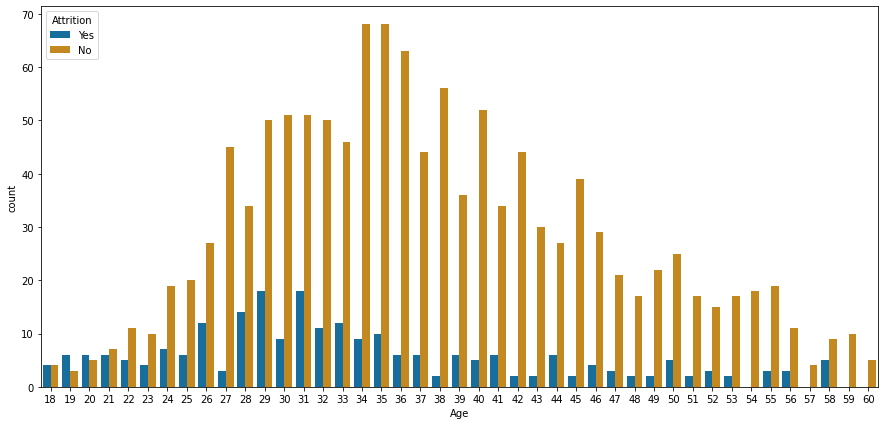

In [431]:
plt.subplots(figsize=(15,7))
sns.countplot(x='Age',hue='Attrition',data=df,palette='colorblind')

Findings from the above observation are mentioned below:

1) Age group from 18 to 21 has high no. of Attrition, but we can also observe that From 22 it started decreasing.

2) Age group from 30 to 56 has very less Attrition.

3) There is no Attrition in 57 years however 58 years has good amount of Attrition.

4) 59 to 60 has no Attrition at all.

# How BusinessTravel is impacting Attrition

In [432]:
len(df[(df['BusinessTravel']=='Travel_Rarely')&(df['Attrition']=='Yes')])

156

In [433]:
len(df[(df['BusinessTravel']=='Travel_Rarely')&(df['Attrition']=='No')])

887

In [434]:
len(df[(df['BusinessTravel']=='Travel_Frequently')&(df['Attrition']=='Yes')])

69

In [435]:
len(df[(df['BusinessTravel']=='Travel_Frequently')&(df['Attrition']=='No')])

208

In [436]:
len(df[(df['BusinessTravel']=='Non-Travel')&(df['Attrition']=='Yes')])

12

In [437]:
len(df[(df['BusinessTravel']=='Non-Travel')&(df['Attrition']=='No')])

138

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

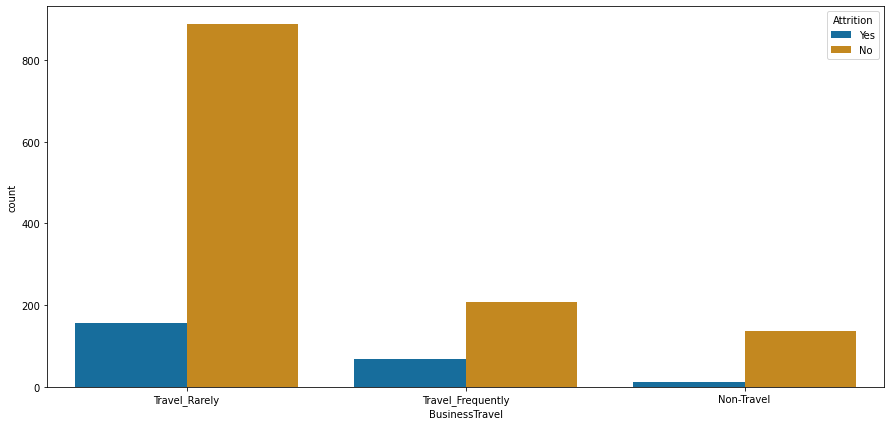

In [438]:
plt.subplots(figsize=(15,7))
sns.countplot(x='BusinessTravel',hue='Attrition',data=df,palette='colorblind')

Findings from the above observation are mentioned below:
    
1) Total no. of employees who Travel_Rarely = 1044 out of which 156 has left the organization and 887 are still working in that company.

2) Total no. of employees who Travel_Frequently = 277 out of which 69 has left the organization and 208 are still working in that company.

3) Total no. of employees who are Non-Traveller = 150 out of which 12 has left the organization and 138 are still working in that company.

# How Department is impacting Attrition

In [439]:
len(df[(df['Department']=='Sales')&(df['Attrition']=='Yes')])

92

In [440]:
len(df[(df['Department']=='Sales')&(df['Attrition']=='No')])

354

In [441]:
len(df[(df['Department']=='Research & Development')&(df['Attrition']=='Yes')])

133

In [442]:
len(df[(df['Department']=='Research & Development')&(df['Attrition']=='No')])

828

In [443]:
len(df[(df['Department']=='Human Resources')&(df['Attrition']=='Yes')])

12

In [444]:
len(df[(df['Department']=='Human Resources')&(df['Attrition']=='No')])

51

<AxesSubplot:xlabel='Department', ylabel='count'>

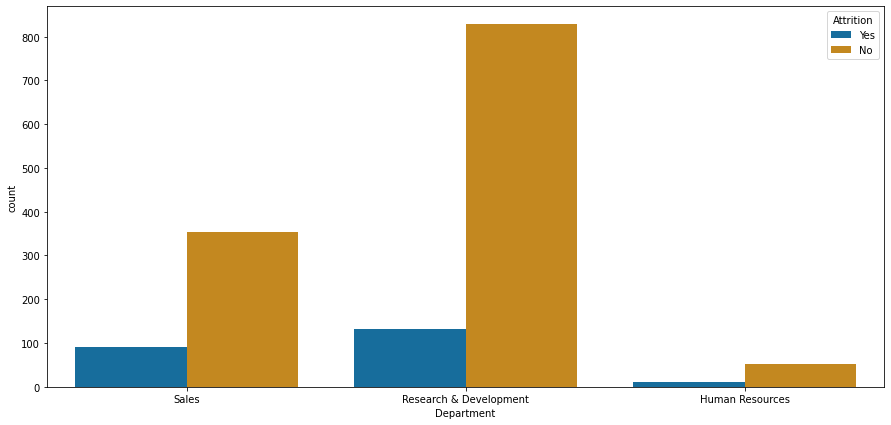

In [445]:
plt.subplots(figsize=(15,7))
sns.countplot(x='Department',hue='Attrition',data=df,palette='colorblind')

Findings from the above observation are mentioned below:
    
1) Total no. of employees who are working in Sales department = 446 out of which 92 has left the organization and 354 are still working in that company.

2) Total no. of employees who are working in Research & Development department = 961 out of which 133 has left the organization and 828 are still working in that company.

3) Total no. of employees who are working in Human Resources department = 63 out of which 12 has left the organization and 51 are still working in that company.

# How Education is impacting Attrition

In [446]:
len(df[(df['Education']==1)&(df['Attrition']=='Yes')])

31

In [447]:
len(df[(df['Education']==1)&(df['Attrition']=='No')])

139

In [448]:
len(df[(df['Education']==2)&(df['Attrition']=='Yes')])

44

In [449]:
len(df[(df['Education']==2)&(df['Attrition']=='No')])

238

In [450]:
len(df[(df['Education']==3)&(df['Attrition']=='Yes')])

99

In [451]:
len(df[(df['Education']==3)&(df['Attrition']=='No')])

473

In [452]:
len(df[(df['Education']==4)&(df['Attrition']=='Yes')])

58

In [453]:
len(df[(df['Education']==4)&(df['Attrition']=='No')])

340

In [454]:
len(df[(df['Education']==5)&(df['Attrition']=='Yes')])

5

In [455]:
len(df[(df['Education']==5)&(df['Attrition']=='No')])

43

<AxesSubplot:xlabel='Education', ylabel='count'>

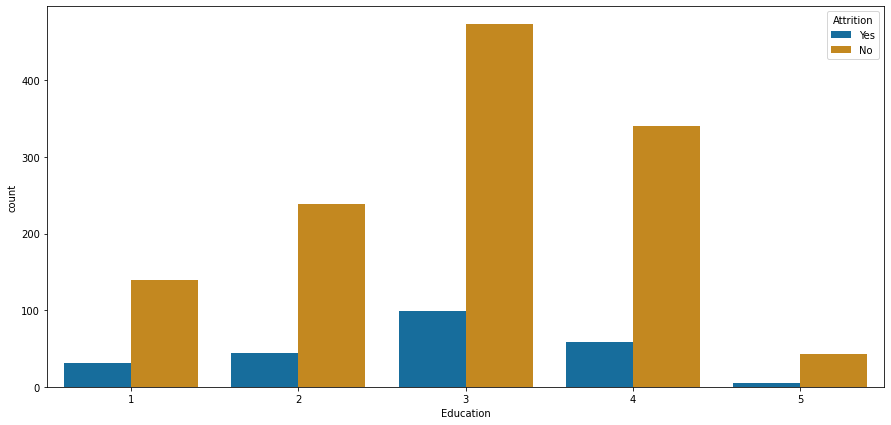

In [456]:
plt.subplots(figsize=(15,7))
sns.countplot(x='Education',hue='Attrition',data=df,palette='colorblind')

Findings from the above observation are mentioned below:
    
1) Total no. of employees who have Education 1 = 170 out of which 31 has left the organization and 139 are still working in that company.

2) Total no. of employees who have Education 2 = 282 out of which 44 has left the organization and 238 are still working in that company.

3) Total no. of employees who have Education 3 = 572 out of which 99 has left the organization and 473 are still working in that company.

4) Total no. of employees who have Education 4 = 398 out of which 58 has left the organization and 340 are still working in that company.

5) Total no. of employees who have Education 5 = 48 out of which 5 has left the organization and 43 are still working in that company.

# How Education field column is impacting Attrition

In [457]:
len(df[(df['EducationField']=='Life Sciences')&(df['Attrition']=='Yes')])

89

In [458]:
len(df[(df['EducationField']=='Life Sciences')&(df['Attrition']=='No')])

517

In [459]:
len(df[(df['EducationField']=='Technical Degree')&(df['Attrition']=='Yes')])

32

In [460]:
len(df[(df['EducationField']=='Technical Degree')&(df['Attrition']=='No')])

100

In [461]:
len(df[(df['EducationField']=='Medical')&(df['Attrition']=='Yes')])

63

In [462]:
len(df[(df['EducationField']=='Medical')&(df['Attrition']=='No')])

401

In [463]:
len(df[(df['EducationField']=='Marketing')&(df['Attrition']=='Yes')])

35

In [464]:
len(df[(df['EducationField']=='Marketing')&(df['Attrition']=='No')])

124

In [465]:
len(df[(df['EducationField']=='Human Resources')&(df['Attrition']=='Yes')])

7

In [466]:
len(df[(df['EducationField']=='Human Resources')&(df['Attrition']=='No')])

20

In [467]:
len(df[(df['EducationField']=='Other')&(df['Attrition']=='Yes')])

11

In [468]:
len(df[(df['EducationField']=='Other')&(df['Attrition']=='No')])

71

<AxesSubplot:xlabel='EducationField', ylabel='count'>

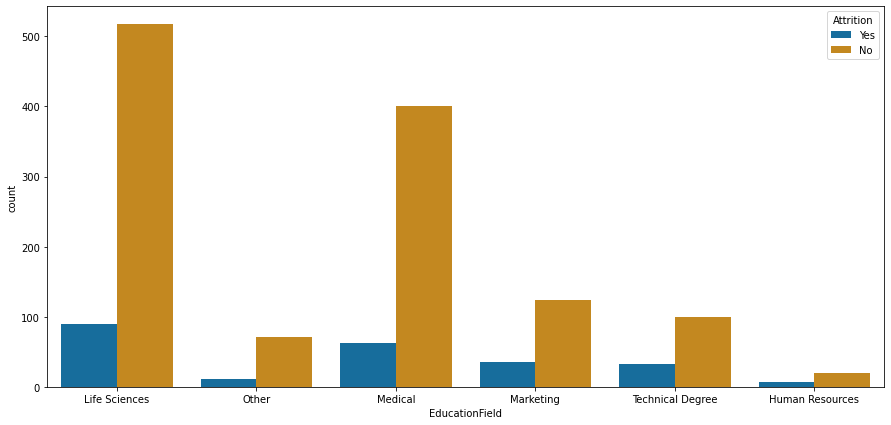

In [469]:
plt.subplots(figsize=(15,7))
sns.countplot(x='EducationField',hue='Attrition',data=df,palette='colorblind')

Findings from the above observation are mentioned below:
    
1) Total no. of employees who have Life science EducationField  = 606 out of which 89 has left the organization and 517 are still working in that company.

2) Total no. of employees who have Medical EducationField  = 464 out of which 63 has left the organization and 401 are still working in that company.

3) Total no. of employees who have Marketing EducationField  = 159 out of which 35 has left the organization and 124 are still working in that company.

4) Total no. of employees who have Human resource EducationField  = 27 out of which 7 has left the organization and 24 are still working in that company.

5) Total no. of employees who have Technical Degree EducationField  = 132 out of which 32 has left the organization and 100 are still working in that company.

6) Total no. of employees who have Other EducationField  = 82 out of which 11 has left the organization and 71 are still working in that company.

# How EnvironmentSatisfaction column is impacting Attrition

In [470]:
len(df[(df['EnvironmentSatisfaction']==1)&(df['Attrition']=='Yes')])

72

In [471]:
len(df[(df['EnvironmentSatisfaction']==1)&(df['Attrition']=='No')])

212

In [472]:
len(df[(df['EnvironmentSatisfaction']==2)&(df['Attrition']=='Yes')])

43

In [473]:
len(df[(df['EnvironmentSatisfaction']==2)&(df['Attrition']=='No')])

244

In [474]:
len(df[(df['EnvironmentSatisfaction']==3)&(df['Attrition']=='Yes')])

62

In [475]:
len(df[(df['EnvironmentSatisfaction']==3)&(df['Attrition']=='No')])

391

In [476]:
len(df[(df['EnvironmentSatisfaction']==4)&(df['Attrition']=='Yes')])

60

In [477]:
len(df[(df['EnvironmentSatisfaction']==4)&(df['Attrition']=='No')])

386

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

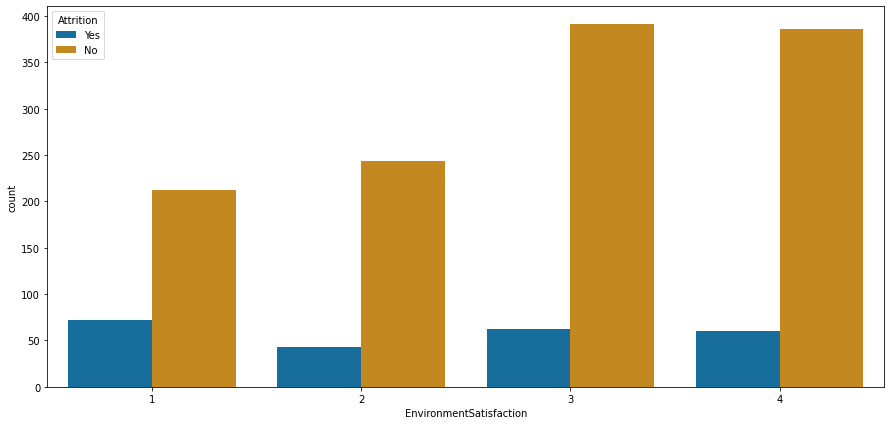

In [478]:
plt.subplots(figsize=(15,7))
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df,palette='colorblind')

Findings from the above observation are mentioned below:
    
1) Total no. of employees who have EnvironmentSatisfaction 1  = 284 out of which 72 has left the organization and 212 are still working in that company.

2) Total no. of employees who have EnvironmentSatisfaction 2  = 287 out of which 43 has left the organization and 244 are still working in that company.

3) Total no. of employees who have EnvironmentSatisfaction 3  = 453 out of which 62 has left the organization and 391 are still working in that company.

4) Total no. of employees who have EnvironmentSatisfaction 4  = 446 out of which 60 has left the organization and 386 are still working in that company.


# How JobSatisfaction column is impacting Attrition

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

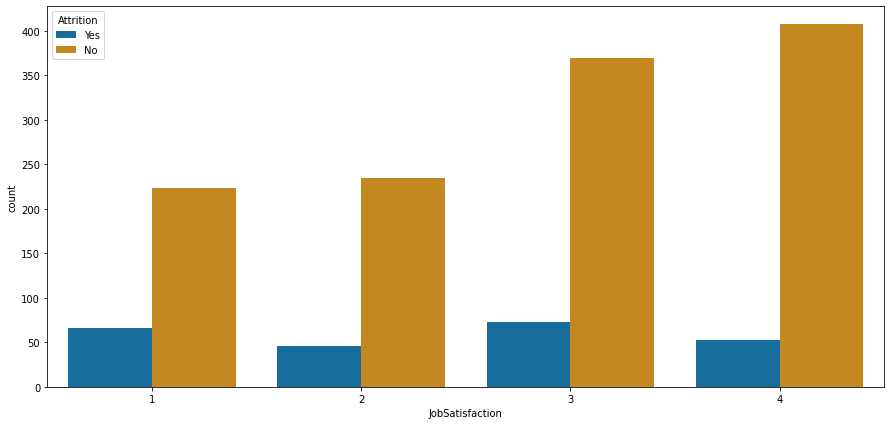

In [479]:
plt.subplots(figsize=(15,7))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df,palette='colorblind')

In [480]:
len(df[(df['JobSatisfaction']==1)&(df['Attrition']=='Yes')])

66

In [481]:
len(df[(df['JobSatisfaction']==1)&(df['Attrition']=='No')])

223

In [482]:
len(df[(df['JobSatisfaction']==2)&(df['Attrition']=='Yes')])

46

In [483]:
len(df[(df['JobSatisfaction']==2)&(df['Attrition']=='No')])

234

In [484]:
len(df[(df['JobSatisfaction']==3)&(df['Attrition']=='Yes')])

73

In [485]:
len(df[(df['JobSatisfaction']==3)&(df['Attrition']=='No')])

369

In [486]:
len(df[(df['JobSatisfaction']==4)&(df['Attrition']=='Yes')])

52

In [487]:
len(df[(df['JobSatisfaction']==4)&(df['Attrition']=='No')])

407

Findings from the above observation are mentioned below:
    
1) Total no. of employees who have JobSatisfaction 1  = 289 out of which 66 has left the organization and 223 are still working in that company.

2) Total no. of employees who have JobSatisfaction 2  = 280 out of which 46 has left the organization and 234 are still working in that company.

3) Total no. of employees who have JobSatisfaction 3  = 442 out of which 73 has left the organization and 369 are still working in that company.

4) Total no. of employees who have JobSatisfaction 4  = 459 out of which 52 has left the organization and 407 are still working in that company.


# How JobRole column is impacting Attrition

<AxesSubplot:xlabel='JobRole', ylabel='count'>

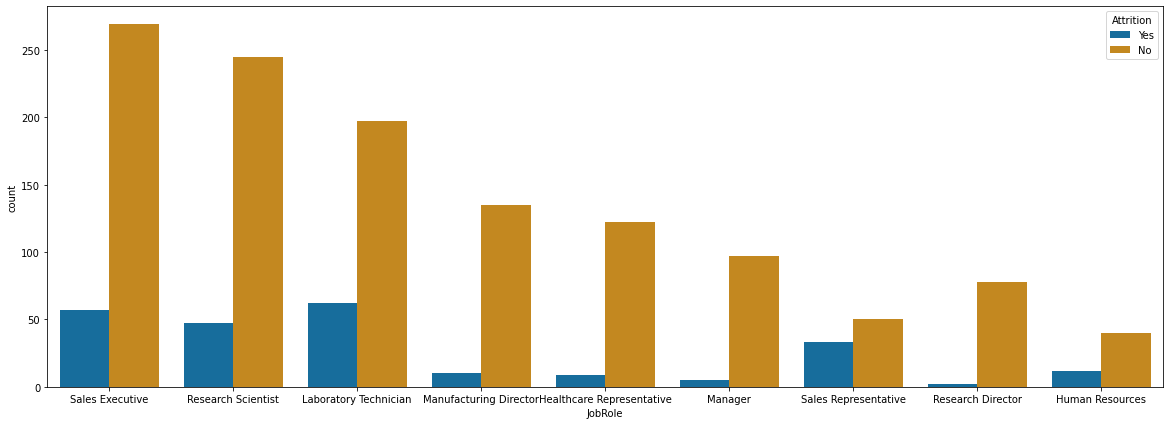

In [488]:
plt.subplots(figsize=(20,7))
sns.countplot(x='JobRole',hue='Attrition',data=df,palette='colorblind')

In [489]:
len(df[(df['JobRole']=='Sales Executive')&(df['Attrition']=='Yes')])

57

In [490]:
len(df[(df['JobRole']=='Sales Executive')&(df['Attrition']=='No')])

269

In [491]:
len(df[(df['JobRole']=='Research Scientist')&(df['Attrition']=='Yes')])

47

In [492]:
len(df[(df['JobRole']=='Research Scientist')&(df['Attrition']=='No')])

245

In [493]:
len(df[(df['JobRole']=='Laboratory Technician')&(df['Attrition']=='Yes')])

62

In [494]:
len(df[(df['JobRole']=='Laboratory Technician')&(df['Attrition']=='No')])

197

In [495]:
len(df[(df['JobRole']=='Manufacturing Director')&(df['Attrition']=='Yes')])

10

In [496]:
len(df[(df['JobRole']=='Manufacturing Director')&(df['Attrition']=='No')])

135

In [497]:
len(df[(df['JobRole']=='Healthcare Representative')&(df['Attrition']=='Yes')])

9

In [498]:
len(df[(df['JobRole']=='Healthcare Representative')&(df['Attrition']=='No')])

122

In [499]:
len(df[(df['JobRole']=='Manager')&(df['Attrition']=='Yes')])

5

In [500]:
len(df[(df['JobRole']=='Manager')&(df['Attrition']=='No')])

97

In [501]:
len(df[(df['JobRole']=='Sales Representative')&(df['Attrition']=='Yes')])

33

In [502]:
len(df[(df['JobRole']=='Sales Representative')&(df['Attrition']=='No')])

50

In [503]:
len(df[(df['JobRole']=='Research Director')&(df['Attrition']=='Yes')])

2

In [504]:
len(df[(df['JobRole']=='Research Director')&(df['Attrition']=='No')])

78

In [505]:
len(df[(df['JobRole']=='Human Resources')&(df['Attrition']=='Yes')])

12

In [506]:
len(df[(df['JobRole']=='Human Resources')&(df['Attrition']=='No')])

40

Findings from the above observation are mentioned below:
    
1) Total no. of employees whose JobRole is Sales Executive  =  326  out of which 57 has left the organization and 269 are still working in that company.

2)  Total no. of employees whose JobRole is Research Scientist = 292 out of which 47  has left the organization and 245 are still working in that company.

3)  Total no. of employees whose JobRole is Laboratory Technician = 259 out of which 62 has left the organization and 197 are still working in that company.

4)  Total no. of employees whose JobRole is Manufacturing Director = 145 out of which 10 has left the organization and 135 are still working in that company.

5)  Total no. of employees whose JobRole is Healthcare Representative  = 131 out of which 9 has left the organization and 122 are still working in that company.
    
6)  Total no. of employees whose JobRole is Manager  = 102 out of which 5 has left the organization and 97 are still working in that company.
        
7)  Total no. of employees whose JobRole is Sales Representative  = 83 out of which 33 has left the organization and 50 are still working in that company.
            
8)   Total no. of employees whose JobRole is Research Director  = 80 out of which 2 has left the organization and 78 are still working in that company.
                
9)   Total no. of employees whose JobRole is Human Resources  = 52 out of which 12 has left the organization and 40 are still working in that company.

# How Gender column is impacting Attrition

<AxesSubplot:xlabel='Gender', ylabel='count'>

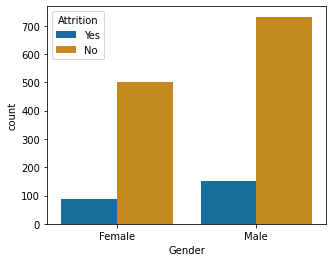

In [507]:
plt.subplots(figsize=(5,4))
sns.countplot(x='Gender',hue='Attrition',data=df,palette='colorblind')

In [508]:
len(df[(df['Gender']=='Male')&(df['Attrition']=='Yes')])

150

In [509]:
len(df[(df['Gender']=='Male')&(df['Attrition']=='No')])

732

In [510]:
len(df[(df['Gender']=='Female')&(df['Attrition']=='Yes')])

87

In [511]:
len(df[(df['Gender']=='Female')&(df['Attrition']=='No')])

501

Findings from the above observation are mentioned below:

1) Total no. of employees whose Gender is Male = 882 out of which 150 has left the organization and 732 are still working in that company.

2) Total no. of employees whose Gender is Female = 588 out of which 87 has left the organization and 501 are still working in that company.

# How JobInvolvement column is impacting Attrition

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

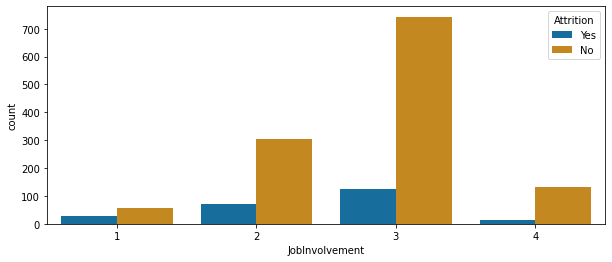

In [512]:
plt.subplots(figsize=(10,4))
sns.countplot(x='JobInvolvement',hue='Attrition',data=df,palette='colorblind')

In [513]:
len(df[(df['JobInvolvement']==1)&(df['Attrition']=='Yes')])

28

In [514]:
len(df[(df['JobInvolvement']==1)&(df['Attrition']=='No')])

55

In [515]:
len(df[(df['JobInvolvement']==2)&(df['Attrition']=='Yes')])

71

In [516]:
len(df[(df['JobInvolvement']==2)&(df['Attrition']=='No')])

304

In [517]:
len(df[(df['JobInvolvement']==3)&(df['Attrition']=='Yes')])

125

In [518]:
len(df[(df['JobInvolvement']==3)&(df['Attrition']=='No')])

743

In [519]:
len(df[(df['JobInvolvement']==4)&(df['Attrition']=='Yes')])

13

In [520]:
len(df[(df['JobInvolvement']==4)&(df['Attrition']=='No')])

131

Findings from the above observation are mentioned below:
    
1) Total no. of employees under  JobInvolvement 1  = 83 out of which 28 has left the organization and 55 are still working in that company.

2) Total no. of employees under  JobInvolvement 2  = 375 out of which 71 has left the organization and 304 are still working in that company.

3) Total no. of employees under  JobInvolvement 3  = 868 out of which 125 has left the organization and 743 are still working in that company.

4) Total no. of employees under  JobInvolvement 4  = 144 out of which 13 has left the organization and 131 are still working in that company.


# How JobLevel column is impacting Attrition

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

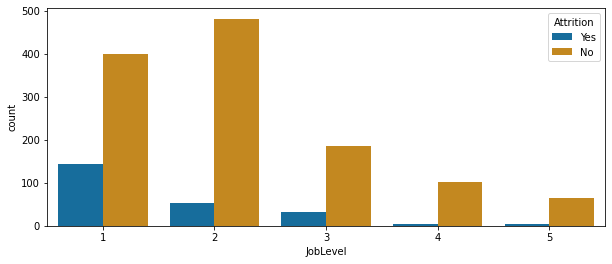

In [521]:
plt.subplots(figsize=(10,4))
sns.countplot(x='JobLevel',hue='Attrition',data=df,palette='colorblind')

In [522]:
len(df[(df['JobLevel']==1)&(df['Attrition']=='Yes')])

143

In [523]:
len(df[(df['JobLevel']==1)&(df['Attrition']=='No')])

400

In [524]:
len(df[(df['JobLevel']==2)&(df['Attrition']=='Yes')])

52

In [525]:
len(df[(df['JobLevel']==2)&(df['Attrition']=='No')])

482

In [526]:
len(df[(df['JobLevel']==3)&(df['Attrition']=='Yes')])

32

In [527]:
len(df[(df['JobLevel']==3)&(df['Attrition']=='No')])

186

In [528]:
len(df[(df['JobLevel']==4)&(df['Attrition']=='Yes')])

5

In [529]:
len(df[(df['JobLevel']==4)&(df['Attrition']=='No')])

101

In [530]:
len(df[(df['JobLevel']==5)&(df['Attrition']=='Yes')])

5

In [531]:
len(df[(df['JobLevel']==5)&(df['Attrition']=='No')])

64

Findings from the above observation are mentioned below:
    
1) Total no. of employees whose JobLevel 1 = 543 out of which 143 has left the organization and 400 are still working in that company.

2) Total no. of employees whose JobLevel 2 = 534 out of which 52 has left the organization and 482 are still working in that company.

3) Total no. of employees whose JobLevel 3 = 218 out of which 32 has left the organization and 186 are still working in that company.

4) Total no. of employees whose JobLevel 4 = 106 out of which 5 has left the organization and 101 are still working in that company.

5) Total no. of employees whose JobLevel 5 = 69 out of which 5 has left the organization and 64 are still working in that company.

# How MaritalStatus column is impacting Attrition

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

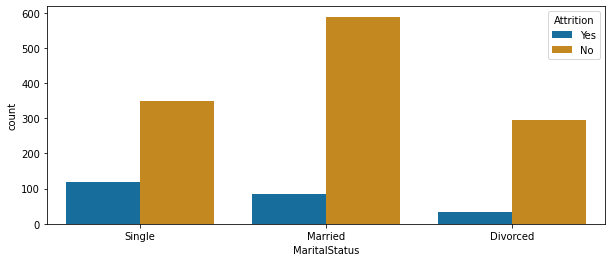

In [532]:
plt.subplots(figsize=(10,4))
sns.countplot(x='MaritalStatus',hue='Attrition',data=df,palette='colorblind')

In [533]:
len(df[(df['MaritalStatus']=='Single')&(df['Attrition']=='Yes')])

120

In [534]:
len(df[(df['MaritalStatus']=='Single')&(df['Attrition']=='No')])

350

In [535]:
len(df[(df['MaritalStatus']=='Married')&(df['Attrition']=='Yes')])

84

In [536]:
len(df[(df['MaritalStatus']=='Married')&(df['Attrition']=='No')])

589

In [537]:
len(df[(df['MaritalStatus']=='Divorced')&(df['Attrition']=='Yes')])

33

In [538]:
len(df[(df['MaritalStatus']=='Divorced')&(df['Attrition']=='No')])

294

Findings from the above observation are mentioned below:

1) Total no. of employees whose MaritalStatus is Single = 470 out of which 120 has left the organization and 350 are still working in that company.

2) Total no. of employees whose MaritalStatus is Married = 673 out of which 84 has left the organization and 589 are still working in that company.

3) Total no. of employees whose MaritalStatus is Divorced = 327 out of which 33 has left the organization and 294 are still working in that company.

# How NumCompaniesWorked column is impacting Attrition

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

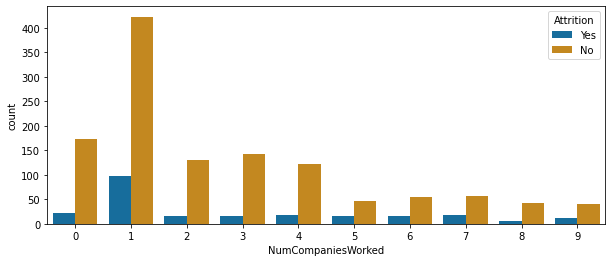

In [539]:
plt.subplots(figsize=(10,4))
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=df,palette='colorblind')

In [540]:
len(df[(df['NumCompaniesWorked']==0)&(df['Attrition']=='Yes')])

23

In [541]:
len(df[(df['NumCompaniesWorked']==0)&(df['Attrition']=='No')])

174

In [542]:
len(df[(df['NumCompaniesWorked']==1)&(df['Attrition']=='Yes')])

98

In [543]:
len(df[(df['NumCompaniesWorked']==1)&(df['Attrition']=='No')])

423

In [544]:
len(df[(df['NumCompaniesWorked']==2)&(df['Attrition']=='Yes')])

16

In [545]:
len(df[(df['NumCompaniesWorked']==2)&(df['Attrition']=='No')])

130

In [546]:
len(df[(df['NumCompaniesWorked']==3)&(df['Attrition']=='Yes')])

16

In [547]:
len(df[(df['NumCompaniesWorked']==3)&(df['Attrition']=='No')])

143

In [548]:
len(df[(df['NumCompaniesWorked']==4)&(df['Attrition']=='Yes')])

17

In [549]:
len(df[(df['NumCompaniesWorked']==4)&(df['Attrition']=='No')])

122

In [550]:
len(df[(df['NumCompaniesWorked']==5)&(df['Attrition']=='Yes')])

16

In [551]:
len(df[(df['NumCompaniesWorked']==5)&(df['Attrition']=='No')])

47

In [552]:
len(df[(df['NumCompaniesWorked']==6)&(df['Attrition']=='Yes')])

16

In [553]:
len(df[(df['NumCompaniesWorked']==6)&(df['Attrition']=='No')])

54

In [554]:
len(df[(df['NumCompaniesWorked']==7)&(df['Attrition']=='Yes')])

17

In [555]:
len(df[(df['NumCompaniesWorked']==7)&(df['Attrition']=='No')])

57

In [556]:
len(df[(df['NumCompaniesWorked']==8)&(df['Attrition']=='Yes')])

6

In [557]:
len(df[(df['NumCompaniesWorked']==8)&(df['Attrition']=='No')])

43

In [558]:
len(df[(df['NumCompaniesWorked']==9)&(df['Attrition']=='Yes')])

12

In [559]:
len(df[(df['NumCompaniesWorked']==9)&(df['Attrition']=='No')])

40

Findings from the above observation are mentioned below:

1) Total no. of employees whose Number of Companies Worked 0 = 197 out of which 23 has left the organization and 174 are still working in that company.

2) Total no. of employees whose Number of Companies Worked 1 = 521 out of which 98 has left the organization and 423 are still working in that company.

3) Total no. of employees whose Number of Companies Worked 2 = 146 out of which 16 has left the organization and 130 are still working in that company.

4) Total no. of employees whose Number of Companies Worked 3 = 159 out of which 16 has left the organization and 143 are still working in that company.

5) Total no. of employees whose Number of Companies Worked 4 =  139 out of which 17 has left the organization and 122 are still working in that company.

6) Total no. of employees whose Number of Companies Worked 5 = 63 out of which 16 has left the organization and 47 are still working in that company.

7) Total no. of employees whose Number of Companies Worked 6 = 70 out of which 16 has left the organization and 54 are still working in that company.

8) Total no. of employees whose Number of Companies Worked 7 = 74 out of which 17 has left the organization and 57 are still working in that company.

9) Total no. of employees whose Number of Companies Worked 8 = 49 out of which 6 has left the organization and 43 are still working in that company.

10 Total no. of employees whose Number of Companies Worked 9 = 52 out of which 12 has left the organization and 40 are still working in that company.

# How PercentSalaryHike column is impacting Attrition

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

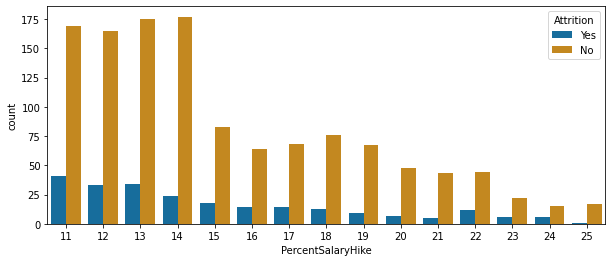

In [560]:
plt.subplots(figsize=(10,4))
sns.countplot(x='PercentSalaryHike',hue='Attrition',data=df,palette='colorblind')

In [561]:
len(df[(df['PercentSalaryHike']==11)&(df['Attrition']=='Yes')])

41

In [562]:
len(df[(df['PercentSalaryHike']==11)&(df['Attrition']=='No')])

169

In [563]:
len(df[(df['PercentSalaryHike']==12)&(df['Attrition']=='Yes')])

33

In [564]:
len(df[(df['PercentSalaryHike']==12)&(df['Attrition']=='No')])

165

In [565]:
len(df[(df['PercentSalaryHike']==13)&(df['Attrition']=='Yes')])

34

In [566]:
len(df[(df['PercentSalaryHike']==13)&(df['Attrition']=='No')])

175

In [567]:
len(df[(df['PercentSalaryHike']==14)&(df['Attrition']=='Yes')])

24

In [568]:
len(df[(df['PercentSalaryHike']==14)&(df['Attrition']=='No')])

177

In [569]:
len(df[(df['PercentSalaryHike']==15)&(df['Attrition']=='Yes')])

18

In [570]:
len(df[(df['PercentSalaryHike']==15)&(df['Attrition']=='No')])

83

In [571]:
len(df[(df['PercentSalaryHike']==16)&(df['Attrition']=='Yes')])

14

In [572]:
len(df[(df['PercentSalaryHike']==16)&(df['Attrition']=='No')])

64

In [573]:
len(df[(df['PercentSalaryHike']==17)&(df['Attrition']=='Yes')])

14

In [574]:
len(df[(df['PercentSalaryHike']==17)&(df['Attrition']=='No')])

68

In [575]:
len(df[(df['PercentSalaryHike']==18)&(df['Attrition']=='Yes')])

13

In [576]:
len(df[(df['PercentSalaryHike']==18)&(df['Attrition']=='No')])

76

In [577]:
len(df[(df['PercentSalaryHike']==19)&(df['Attrition']=='Yes')])

9

In [578]:
len(df[(df['PercentSalaryHike']==19)&(df['Attrition']=='No')])

67

In [579]:
len(df[(df['PercentSalaryHike']==20)&(df['Attrition']=='Yes')])

7

In [580]:
len(df[(df['PercentSalaryHike']==20)&(df['Attrition']=='No')])

48

In [581]:
len(df[(df['PercentSalaryHike']==21)&(df['Attrition']=='Yes')])

5

In [582]:
len(df[(df['PercentSalaryHike']==21)&(df['Attrition']=='No')])

43

In [583]:
len(df[(df['PercentSalaryHike']==22)&(df['Attrition']=='Yes')])

12

In [584]:
len(df[(df['PercentSalaryHike']==22)&(df['Attrition']=='No')])

44

In [585]:
len(df[(df['PercentSalaryHike']==23)&(df['Attrition']=='Yes')])

6

In [586]:
len(df[(df['PercentSalaryHike']==23)&(df['Attrition']=='No')])

22

In [587]:
len(df[(df['PercentSalaryHike']==24)&(df['Attrition']=='Yes')])

6

In [588]:
len(df[(df['PercentSalaryHike']==24)&(df['Attrition']=='No')])

15

In [589]:
len(df[(df['PercentSalaryHike']==25)&(df['Attrition']=='Yes')])

1

In [590]:
len(df[(df['PercentSalaryHike']==25)&(df['Attrition']=='No')])

17

Findings from the above observation are mentioned below:

1) Total no. of employees whose Percent Salary Hike is 11 =   out of which 41  has left the organization and 169  are still working in that company.

2) Total no. of employees whose Percent Salary Hike is 12 =  198 out of which 33  has left the organization and 165  are still working in that company.

3) Total no. of employees whose Percent Salary Hike is 13 =  189 out of which 34  has left the organization and 175  are still working in that company.

4) Total no. of employees whose Percent Salary Hike is 14 =  201 out of which 24  has left the organization and 177  are still working in that company.

5) Total no. of employees whose Percent Salary Hike is 15 =  101 out of which 18  has left the organization and 83  are still working in that company.

6) Total no. of employees whose Percent Salary Hike is 16 =  78  out of which 14  has left the organization and 64  are still working in that company.

7) Total no. of employees whose Percent Salary Hike is 17 =  82  out of which 14  has left the organization and 68  are still working in that company.

8) Total no. of employees whose Percent Salary Hike is 18 =  89  out of which 13  has left the organization and 76  are still working in that company.

9) Total no. of employees whose Percent Salary Hike is 19 =  76  out of which 9  has left the organization and 67  are still working in that company.

10) Total no. of employees whose Percent Salary Hike is 20 = 55  out of which 7  has left the organization and 48  are still working in that company.

11) Total no. of employees whose Percent Salary Hike is 21 = 48  out of which 5  has left the organization and 43  are still working in that company.

12) Total no. of employees whose Percent Salary Hike is 22 = 56  out of which 12  has left the organization and 44  are still working in that company.

13) Total no. of employees whose Percent Salary Hike is 23 = 28  out of which 6  has left the organization and 22  are still working in that company.

14) Total no. of employees whose Percent Salary Hike is 24 = 21  out of which 6  has left the organization and 15  are still working in that company.

15) Total no. of employees whose Percent Salary Hike is 25 = 18  out of which  1 has left the organization and  17 are still working in that company.

# How PerformanceRating column is impacting Attrition

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

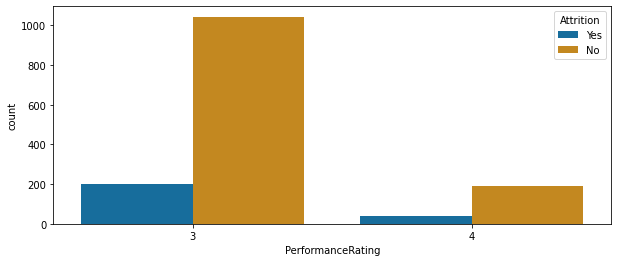

In [591]:
plt.subplots(figsize=(10,4))
sns.countplot(x='PerformanceRating',hue='Attrition',data=df,palette='colorblind')

In [592]:
len(df[(df['PerformanceRating']==3)&(df['Attrition']=='Yes')])

200

In [593]:
len(df[(df['PerformanceRating']==3)&(df['Attrition']=='No')])

1044

In [594]:
len(df[(df['PerformanceRating']==4)&(df['Attrition']=='Yes')])

37

In [595]:
len(df[(df['PerformanceRating']==4)&(df['Attrition']=='No')])

189

Findings from the above observation are mentioned below:

1) Total no. of employees whose Performance Rating is 3 =  1244   out of which 200 has left the organization and 1044 are still working in that company.

2) Total no. of employees whose Performance Rating is 4 =   226   out of which 37 has left the organization and 189 are still working in that company.

# How YearsInCurrentRole column is impacting Attrition

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

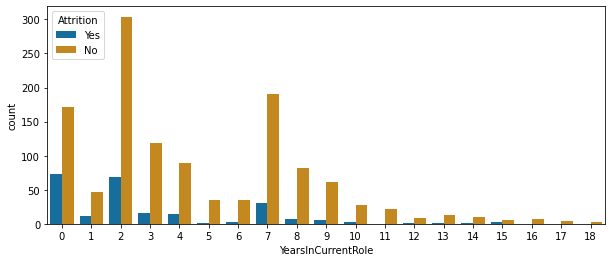

In [596]:
plt.subplots(figsize=(10,4))
sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=df,palette='colorblind')

In [597]:
len(df[(df['YearsInCurrentRole']==0)&(df['Attrition']=='Yes')])

73

In [598]:
len(df[(df['YearsInCurrentRole']==0)&(df['Attrition']=='No')])

171

In [599]:
len(df[(df['YearsInCurrentRole']==1)&(df['Attrition']=='Yes')])

11

In [600]:
len(df[(df['YearsInCurrentRole']==1)&(df['Attrition']=='No')])

46

In [601]:
len(df[(df['YearsInCurrentRole']==2)&(df['Attrition']=='Yes')])

68

In [602]:
len(df[(df['YearsInCurrentRole']==2)&(df['Attrition']=='No')])

304

In [603]:
len(df[(df['YearsInCurrentRole']==3)&(df['Attrition']=='Yes')])

16

In [604]:
len(df[(df['YearsInCurrentRole']==3)&(df['Attrition']=='No')])

119

In [605]:
len(df[(df['YearsInCurrentRole']==4)&(df['Attrition']=='Yes')])

15

In [606]:
len(df[(df['YearsInCurrentRole']==4)&(df['Attrition']=='No')])

89

In [607]:
len(df[(df['YearsInCurrentRole']==5)&(df['Attrition']=='Yes')])

1

In [608]:
len(df[(df['YearsInCurrentRole']==5)&(df['Attrition']=='No')])

35

In [609]:
len(df[(df['YearsInCurrentRole']==6)&(df['Attrition']=='Yes')])

2

In [610]:
len(df[(df['YearsInCurrentRole']==6)&(df['Attrition']=='No')])

35

In [611]:
len(df[(df['YearsInCurrentRole']==7)&(df['Attrition']=='Yes')])

31

In [612]:
len(df[(df['YearsInCurrentRole']==7)&(df['Attrition']=='No')])

191

In [613]:
len(df[(df['YearsInCurrentRole']==8)&(df['Attrition']=='Yes')])

7

In [614]:
len(df[(df['YearsInCurrentRole']==8)&(df['Attrition']=='No')])

82

In [615]:
len(df[(df['YearsInCurrentRole']==9)&(df['Attrition']=='Yes')])

6

In [616]:
len(df[(df['YearsInCurrentRole']==9)&(df['Attrition']=='No')])

61

In [617]:
len(df[(df['YearsInCurrentRole']==10)&(df['Attrition']=='Yes')])

2

In [618]:
len(df[(df['YearsInCurrentRole']==10)&(df['Attrition']=='No')])

27

In [619]:
len(df[(df['YearsInCurrentRole']==11)&(df['Attrition']=='Yes')])

0

In [620]:
len(df[(df['YearsInCurrentRole']==11)&(df['Attrition']=='No')])

22

In [621]:
len(df[(df['YearsInCurrentRole']==12)&(df['Attrition']=='Yes')])

1

In [622]:
len(df[(df['YearsInCurrentRole']==12)&(df['Attrition']=='No')])

9

In [623]:
len(df[(df['YearsInCurrentRole']==13)&(df['Attrition']=='Yes')])

1

In [624]:
len(df[(df['YearsInCurrentRole']==13)&(df['Attrition']=='No')])

13

In [625]:
len(df[(df['YearsInCurrentRole']==14)&(df['Attrition']=='Yes')])

1

In [626]:
len(df[(df['YearsInCurrentRole']==14)&(df['Attrition']=='No')])

10

In [627]:
len(df[(df['YearsInCurrentRole']==15)&(df['Attrition']=='Yes')])

2

In [628]:
len(df[(df['YearsInCurrentRole']==15)&(df['Attrition']=='No')])

6

In [629]:
len(df[(df['YearsInCurrentRole']==16)&(df['Attrition']=='Yes')])

0

In [630]:
len(df[(df['YearsInCurrentRole']==16)&(df['Attrition']=='No')])

7

In [631]:
len(df[(df['YearsInCurrentRole']==17)&(df['Attrition']=='Yes')])

0

In [632]:
len(df[(df['YearsInCurrentRole']==17)&(df['Attrition']=='No')])

4

In [633]:
len(df[(df['YearsInCurrentRole']==18)&(df['Attrition']=='Yes')])

0

In [634]:
len(df[(df['YearsInCurrentRole']==18)&(df['Attrition']=='No')])

2

Findings from the above observation are mentioned below:

1) Total no. of employees whose Years In CurrentRole is 0 = 244 out of which 73 has left the organization and 171 are still working in that company.

2) Total no. of employees whose Years In CurrentRole is 1 = 57 out of which 11 has left the organization and 46 are still working in that company.

3) Total no. of employees whose Years In CurrentRole is 2 = 372 out of which 68 has left the organization and 304 are still working in that company.

4) Total no. of employees whose Years In CurrentRole is 3 = 135 out of which 16 has left the organization and 119 are still working in that company.

5) Total no. of employees whose Years In CurrentRole is 4 = 104 out of which 15 has left the organization and 89 are still working in that company.

6) Total no. of employees whose Years In CurrentRole is 5 = 36 out of which 1 has left the organization and 35 are still working in that company.

7) Total no. of employees whose Years In CurrentRole is 6 = 37 out of which 2 has left the organization and 35 are still working in that company.

8) Total no. of employees whose Years In CurrentRole is 7 = 222 out of which 31 has left the organization and 191 are still working in that company.

9) Total no. of employees whose Years In CurrentRole is 8 = 89 out of which 7 has left the organization and 82 are still working in that company.

10) Total no. of employees whose Years In CurrentRole is 9 = 67 out of which 6 has left the organization and 61 are still working in that company.

11) Total no. of employees whose Years In CurrentRole is 10 = 29 out of which 2 has left the organization and 27 are still working in that company.

12) Total no. of employees whose Years In CurrentRole is 11 = 22 out of which 0 has left the organization and 22 are still working in that company.

13) Total no. of employees whose Years In CurrentRole is 12 = 10 out of which 1 has left the organization and 9 are still working in that company.

14) Total no. of employees whose Years In CurrentRole is 13 = 14 out of which 1 has left the organization and 13 are still working in that company.

15) Total no. of employees whose Years In CurrentRole is 14 = 11 out of which 1 has left the organization and 10 are still working in that company.

16) Total no. of employees whose Years In CurrentRole is 15 = 8 out of which 2 has left the organization and 6 are still working in that company.

17) Total no. of employees whose Years In CurrentRole is 16 = 7 out of which 0 has left the organization and 7 are still working in that company.

18) Total no. of employees whose Years In CurrentRole is 17 = 4 out of which 0 has left the organization and 4 are still working in that company.

19) Total no. of employees whose Years In CurrentRole is 18 = 2  out of which 0 has left the organization and 2 are still working in that company.

# How WorkLifeBalance column is impacting Attrition

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

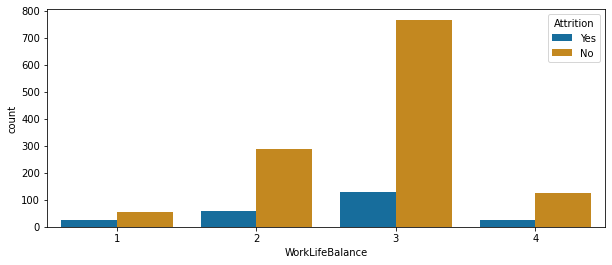

In [635]:
plt.subplots(figsize=(10,4))
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=df,palette='colorblind')

In [636]:
len(df[(df['WorkLifeBalance']==1)&(df['Attrition']=='Yes')])

25

In [637]:
len(df[(df['WorkLifeBalance']==1)&(df['Attrition']=='No')])

55

In [638]:
len(df[(df['WorkLifeBalance']==2)&(df['Attrition']=='Yes')])

58

In [639]:
len(df[(df['WorkLifeBalance']==2)&(df['Attrition']=='No')])

286

In [640]:
len(df[(df['WorkLifeBalance']==3)&(df['Attrition']=='Yes')])

127

In [641]:
len(df[(df['WorkLifeBalance']==3)&(df['Attrition']=='No')])

766

In [642]:
len(df[(df['WorkLifeBalance']==4)&(df['Attrition']=='Yes')])

27

In [643]:
len(df[(df['WorkLifeBalance']==4)&(df['Attrition']=='No')])

126

Findings from the above observation are mentioned below:

1) Total no. of employees whose WorkLifeBalance is 1 = 80 out of which 25 has left the organization and 55 are still working in that company.

2) Total no. of employees whose WorkLifeBalance is 2 = 344 out of which 58 has left the organization and 286 are still working in that company.

3) Total no. of employees whose WorkLifeBalance is 3 = 893 out of which 127 has left the organization and 766 are still working in that company.

4) Total no. of employees whose WorkLifeBalance is 4 = 153 out of which 27 has left the organization and 126 are still working in that company.

# How RelationshipSatisfaction column is impacting Attrition

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

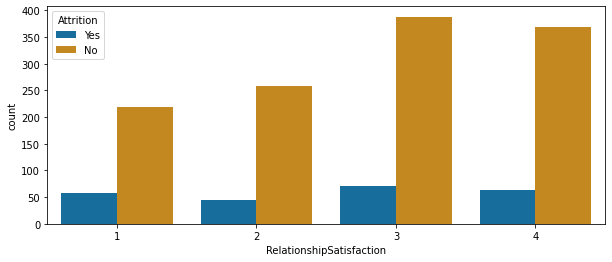

In [644]:
plt.subplots(figsize=(10,4))
sns.countplot(x='RelationshipSatisfaction',hue='Attrition',data=df,palette='colorblind')

In [645]:
len(df[(df['RelationshipSatisfaction']==1)&(df['Attrition']=='Yes')])

57

In [646]:
len(df[(df['RelationshipSatisfaction']==1)&(df['Attrition']=='No')])

219

In [647]:
len(df[(df['RelationshipSatisfaction']==2)&(df['Attrition']=='Yes')])

45

In [648]:
len(df[(df['RelationshipSatisfaction']==2)&(df['Attrition']=='No')])

258

In [649]:
len(df[(df['RelationshipSatisfaction']==3)&(df['Attrition']=='Yes')])

71

In [650]:
len(df[(df['RelationshipSatisfaction']==3)&(df['Attrition']=='No')])

388

In [651]:
len(df[(df['RelationshipSatisfaction']==4)&(df['Attrition']=='Yes')])

64

In [652]:
len(df[(df['RelationshipSatisfaction']==4)&(df['Attrition']=='No')])

368

Findings from the above observation are mentioned below:

1) Total no. of employees whose Relationship Satisfaction is 1 = 276 out of which 57 has left the organization and 219 are still working in that company.

2) Total no. of employees whose Relationship Satisfaction is 2 = 304 out of which 45 has left the organization and 258 are still working in that company.

3) Total no. of employees whose Relationship Satisfaction is 3 = 459 out of which 71 has left the organization and 388 are still working in that company.

4) Total no. of employees whose Relationship Satisfaction is 4 = 432 out of which 64 has left the organization and 368 are still working in that company.

# How YearsSinceLastPromotion column is impacting Attrition

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

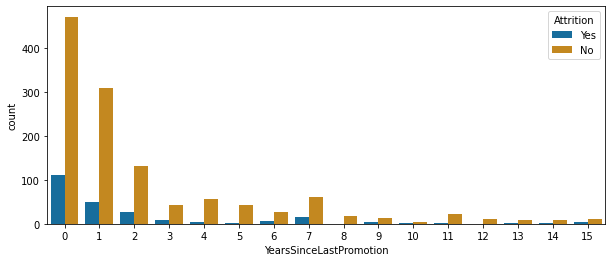

In [653]:
plt.subplots(figsize=(10,4))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df,palette='colorblind')

In [654]:
len(df[(df['YearsSinceLastPromotion']==0)&(df['Attrition']=='Yes')])

110

In [655]:
len(df[(df['YearsSinceLastPromotion']==0)&(df['Attrition']=='No')])

471

In [656]:
len(df[(df['YearsSinceLastPromotion']==1)&(df['Attrition']=='Yes')])

49

In [657]:
len(df[(df['YearsSinceLastPromotion']==1)&(df['Attrition']=='No')])

308

In [658]:
len(df[(df['YearsSinceLastPromotion']==2)&(df['Attrition']=='Yes')])

27

In [659]:
len(df[(df['YearsSinceLastPromotion']==2)&(df['Attrition']=='No')])

132

In [660]:
len(df[(df['YearsSinceLastPromotion']==3)&(df['Attrition']=='Yes')])

9

In [661]:
len(df[(df['YearsSinceLastPromotion']==3)&(df['Attrition']=='No')])

43

In [662]:
len(df[(df['YearsSinceLastPromotion']==4)&(df['Attrition']=='Yes')])

5

In [663]:
len(df[(df['YearsSinceLastPromotion']==4)&(df['Attrition']=='No')])

56

In [664]:
len(df[(df['YearsSinceLastPromotion']==5)&(df['Attrition']=='Yes')])

2

In [665]:
len(df[(df['YearsSinceLastPromotion']==5)&(df['Attrition']=='No')])

43

In [666]:
len(df[(df['YearsSinceLastPromotion']==6)&(df['Attrition']=='Yes')])

6

In [667]:
len(df[(df['YearsSinceLastPromotion']==6)&(df['Attrition']=='No')])

26

In [668]:
len(df[(df['YearsSinceLastPromotion']==7)&(df['Attrition']=='Yes')])

16

In [669]:
len(df[(df['YearsSinceLastPromotion']==7)&(df['Attrition']=='No')])

60

In [670]:
len(df[(df['YearsSinceLastPromotion']==8)&(df['Attrition']=='Yes')])

0

In [671]:
len(df[(df['YearsSinceLastPromotion']==8)&(df['Attrition']=='No')])

18

In [672]:
len(df[(df['YearsSinceLastPromotion']==9)&(df['Attrition']=='Yes')])

4

In [673]:
len(df[(df['YearsSinceLastPromotion']==9)&(df['Attrition']=='No')])

13

In [674]:
len(df[(df['YearsSinceLastPromotion']==10)&(df['Attrition']=='Yes')])

1

In [675]:
len(df[(df['YearsSinceLastPromotion']==10)&(df['Attrition']=='No')])

5

In [676]:
len(df[(df['YearsSinceLastPromotion']==11)&(df['Attrition']=='Yes')])

2

In [677]:
len(df[(df['YearsSinceLastPromotion']==11)&(df['Attrition']=='No')])

22

In [678]:
len(df[(df['YearsSinceLastPromotion']==12)&(df['Attrition']=='Yes')])

0

In [679]:
len(df[(df['YearsSinceLastPromotion']==12)&(df['Attrition']=='No')])

10

In [680]:
len(df[(df['YearsSinceLastPromotion']==13)&(df['Attrition']=='Yes')])

2

In [681]:
len(df[(df['YearsSinceLastPromotion']==13)&(df['Attrition']=='No')])

8

In [682]:
len(df[(df['YearsSinceLastPromotion']==14)&(df['Attrition']=='Yes')])

1

In [683]:
len(df[(df['YearsSinceLastPromotion']==14)&(df['Attrition']=='No')])

8

In [684]:
len(df[(df['YearsSinceLastPromotion']==15)&(df['Attrition']=='Yes')])

3

In [685]:
len(df[(df['YearsSinceLastPromotion']==15)&(df['Attrition']=='No')])

10

Findings from the above observation are mentioned below:

1) Total no. of employees whose Years Since Last Promotion is 0 = 581 out of which 110 has left the organization and 471 are still working in that company.

2) Total no. of employees whose Years Since Last Promotion is 1 = 357 out of which 49 has left the organization and 308 are still working in that company.

3) Total no. of employees whose Years Since Last Promotion is 2 = 154 out of which 27 has left the organization and 127 are still working in that company.

4) Total no. of employees whose Years Since Last Promotion is 3 = 52 out of which 9 has left the organization and 43 are still working in that company.

5) Total no. of employees whose Years Since Last Promotion is 4 = 61 out of which 5 has left the organization and 56 are still working in that company.

6) Total no. of employees whose Years Since Last Promotion is 5 = 45 out of which 2 has left the organization and 43 are still working in that company.

7) Total no. of employees whose Years Since Last Promotion is 6 = 32 out of which 6 has left the organization and 26 are still working in that company.

8) Total no. of employees whose Years Since Last Promotion is 7 = 76 out of which 16 has left the organization and 60 are still working in that company.

9) Total no. of employees whose Years Since Last Promotion is 8 = 18 out of which 0 has left the organization and 18 are still working in that company.

10) Total no. of employees whose Years Since Last Promotion is 9 = 17 out of which 4 has left the organization and 13 are still working in that company.

11) Total no. of employees whose Years Since Last Promotion is 10 = 6 out of which 1 has left the organization and 5 are still working in that company.

12) Total no. of employees whose Years Since Last Promotion is 11 = 24 out of which 2 has left the organization and 22 are still working in that company.

13) Total no. of employees whose Years Since Last Promotion is 12 = 10 out of which 0 has left the organization and 10 are still working in that company.

14) Total no. of employees whose Years Since Last Promotion is 13 = 10 out of which 2 has left the organization and 8 are still working in that company.

15) Total no. of employees whose Years Since Last Promotion is 14 = 9 out of which 1 has left the organization and 8 are still working in that company.

16) Total no. of employees whose Years Since Last Promotion is 15 = 13 out of which 3 has left the organization and 10 are still working in that company.

# How OverTime column is impacting Attrition

<AxesSubplot:xlabel='OverTime', ylabel='count'>

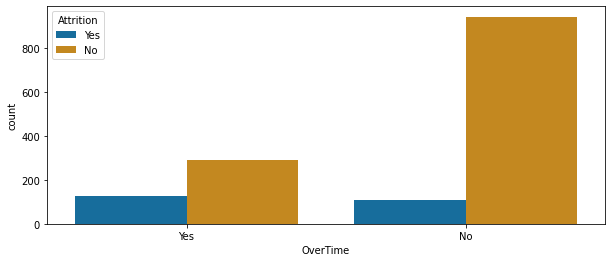

In [686]:
plt.subplots(figsize=(10,4))
sns.countplot(x='OverTime',hue='Attrition',data=df,palette='colorblind')

In [687]:
len(df[(df['OverTime']=='Yes')&(df['Attrition']=='Yes')])

127

In [688]:
len(df[(df['OverTime']=='Yes')&(df['Attrition']=='No')])

289

In [689]:
len(df[(df['OverTime']=='No')&(df['Attrition']=='Yes')])

110

In [690]:
len(df[(df['OverTime']=='No')&(df['Attrition']=='No')])

944

Findings from the above observation are mentioned below:

1) Total no. of employees getting OverTime =      416  out of which 127 has left the organization and 289 are still working in that company.

2) Total no. of employees not getting OverTime =  1054  out of which 110 has left the organization and 944 are still working in that company.

In [691]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


# using map function to convert my target column into numerical

In [692]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [693]:
# Yes = 1 and No =0
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})

In [694]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# Checking correlation

In [695]:
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


# Checking correlation through heatmap

<AxesSubplot:>

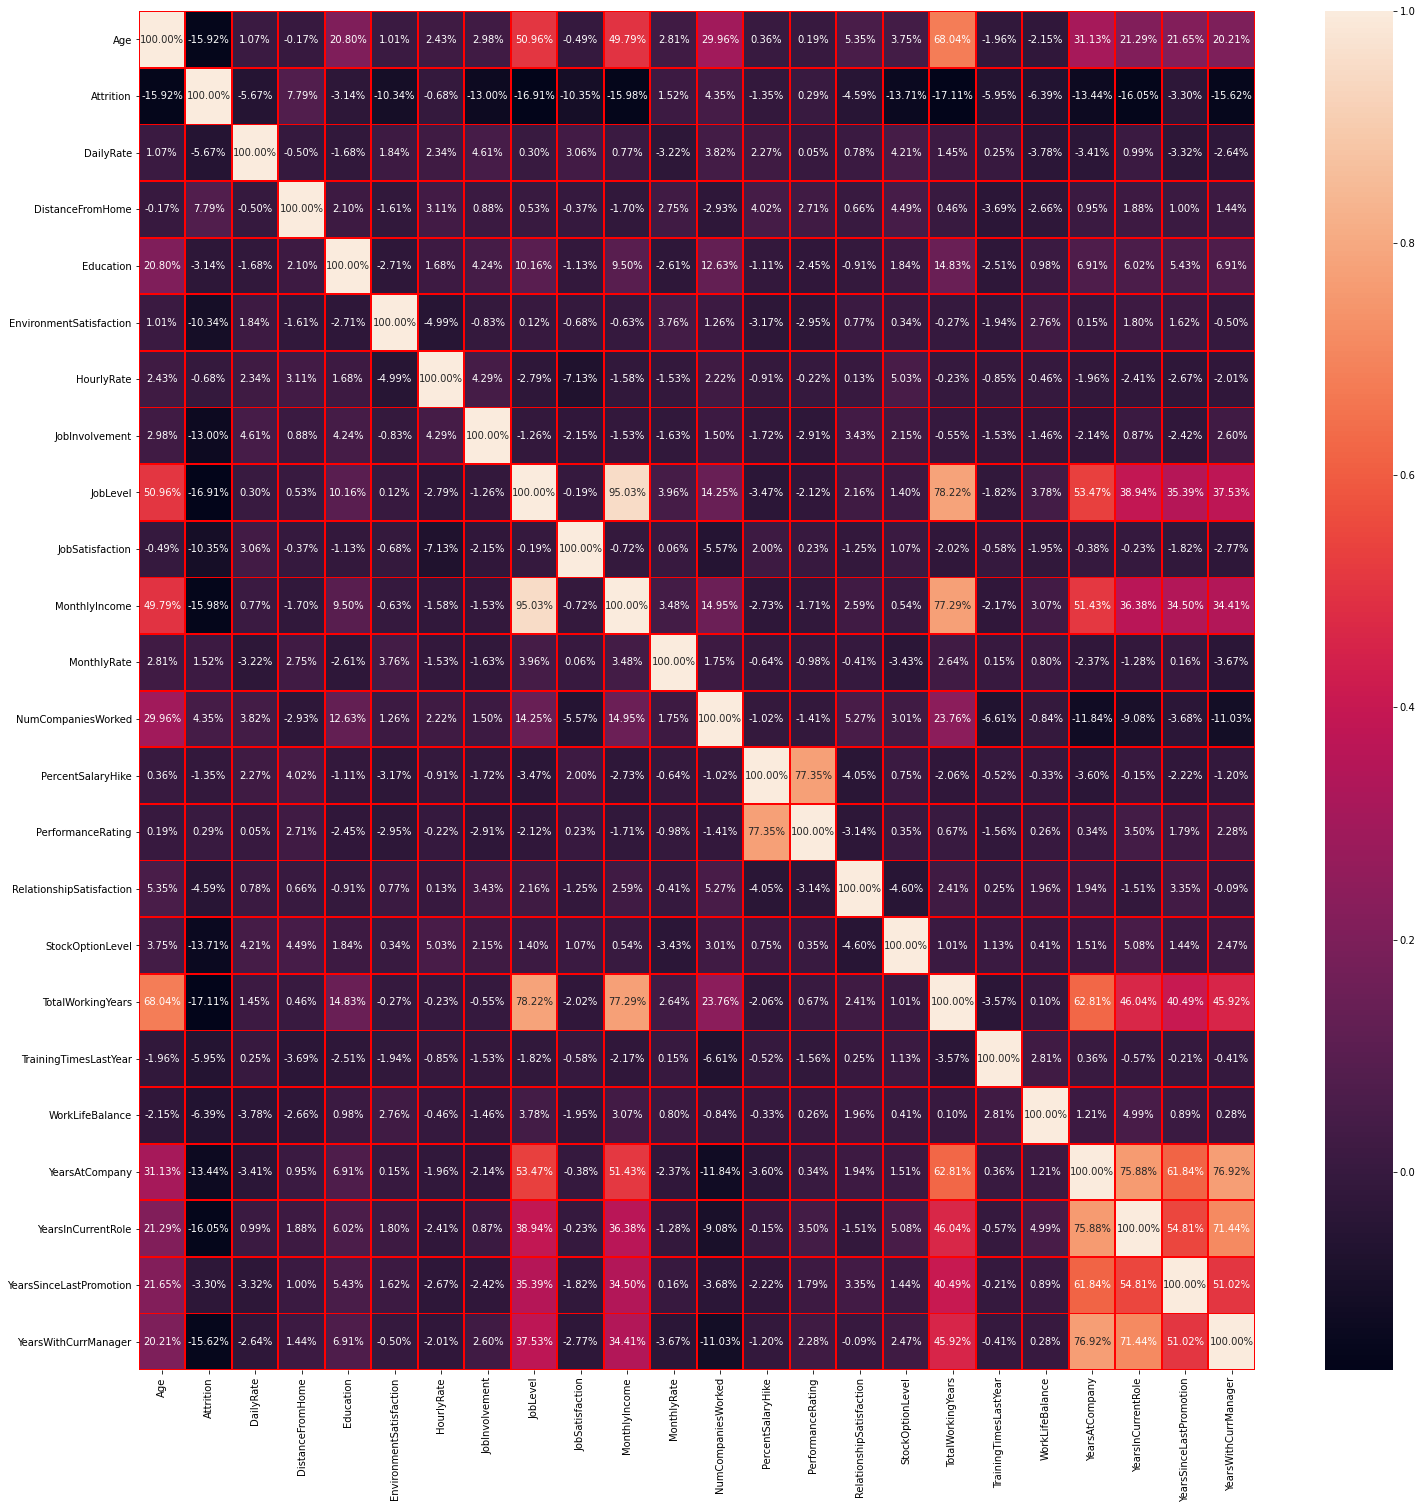

In [696]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,linewidths=0.8,linecolor='r',fmt='.2%')

Findings from the above observation are mentioned below:

1) Age : 15.92% negetive correlation with target column.
    
2) DailyRate : 5.67% negetive correlation with target column.
    
3) DistanceFromHome : 7.79% positive correlation with target column.
    
4) Education : 3.14% negetive correlation with target column.

5) EnvironmentSatisfaction : 10.34% negetive correlation with target column.
    
6) HourlyRate : 0.68% negetive correlation with target column.
    
7) JobInvolvement:13% negetive correlation with target column.
    
8) JobLevel : 16.91% negetive correlation with target column.
    
9) JobSatisfaction : 10.35% negetive correlation with target column.

10) MonthlyIncome : 15.98% negetive correlation with target column.

11) MonthlyRate : 1.52% positive correlation with target column.

12) NumCompaniesWorked : 4.35% positive correlation with target column.

13) PercentSalaryHike : 1.35% negetive correlation with target column.

14) PerformanceRating: 0.29% positive correlation with target column.

15) RelationshipSatisfaction: 4.59% negetive corellation with target column.

16) StockOptionLevel: 13.71% negetive correlation with target column.

17) TotalWorkingYears : 17.11% negetive correlation with target column.

18) TrainingTimesLastYear :5.95% negetive correlation with target column.

19) WorkLifeBalance: 6.39% negetive correlation with target column.

20) YearsAtCompany: 13.44% negetive correlation with target column.
    
21) YearsInCurrentRole: 16.05% negetive correlation with target column.

22) YearsSinceLastPromotion: 3.30% negetive correlation with target column.

23) YearsWithCurrManager: 15.62% negetive correlation with target column.

# Checking Outlier

<AxesSubplot:>

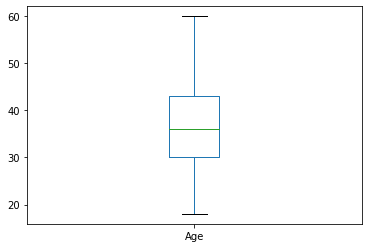

In [697]:
df['Age'].plot.box()

As per above observation there is no outlier in Age column

<AxesSubplot:>

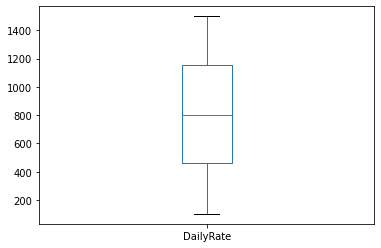

In [698]:
df['DailyRate'].plot.box()

As per above observation there is no outlier in DailyRate column

<AxesSubplot:>

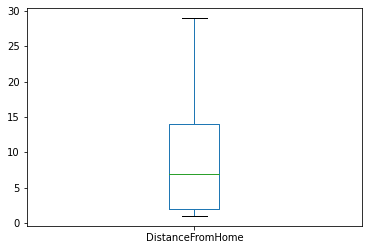

In [699]:
df['DistanceFromHome'].plot.box()

As per above observation there is no outlier in DistanceFromHome column

<AxesSubplot:>

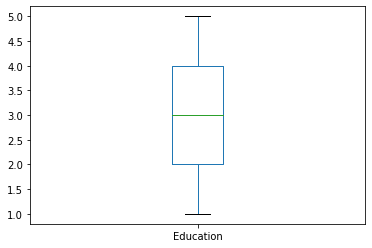

In [700]:
df['Education'].plot.box()

As per above observation there is no outlier in Education column

<AxesSubplot:>

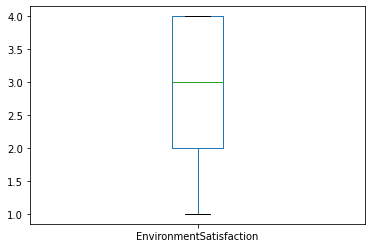

In [701]:
df['EnvironmentSatisfaction'].plot.box()

As per above observation there is no outlier in EnvironmentSatisfaction column

<AxesSubplot:>

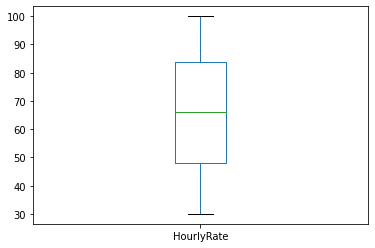

In [702]:
df['HourlyRate'].plot.box()

As per above observation there is no outlier in HourlyRate column

<AxesSubplot:>

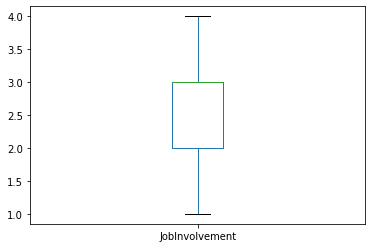

In [703]:
df['JobInvolvement'].plot.box()

As per above observation there is no outlier in JobInvolvement column

<AxesSubplot:>

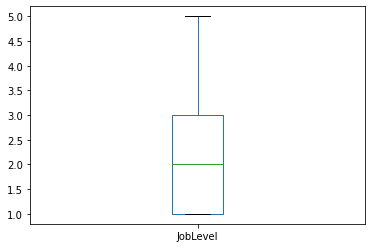

In [704]:
df['JobLevel'].plot.box()

As per above observation there is no outlier in JobLevel column

<AxesSubplot:>

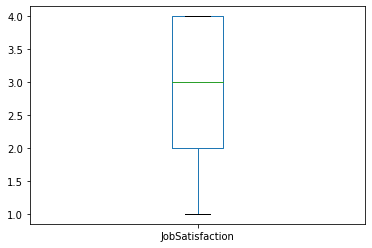

In [705]:
df['JobSatisfaction'].plot.box()

As per above observation there is no outlier in JobSatisfaction column

<AxesSubplot:>

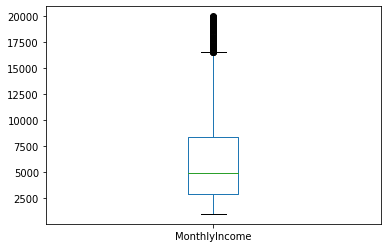

In [706]:
df['MonthlyIncome'].plot.box()

As per above observation there is an outlier in MonthlyIncome column

<AxesSubplot:>

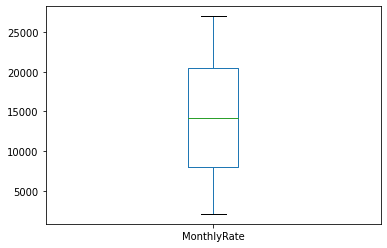

In [707]:
df['MonthlyRate'].plot.box()

As per above observation there is no outlier in MonthlyRate column

<AxesSubplot:>

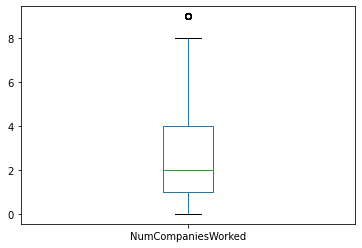

In [708]:
df['NumCompaniesWorked'].plot.box()

As per above observation there is an outlier in NumCompaniesWorked column

<AxesSubplot:>

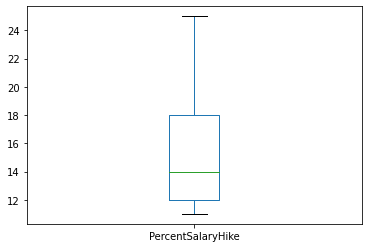

In [709]:
df['PercentSalaryHike'].plot.box()

As per above observation there is no outlier in PercentSalaryHike column

<AxesSubplot:>

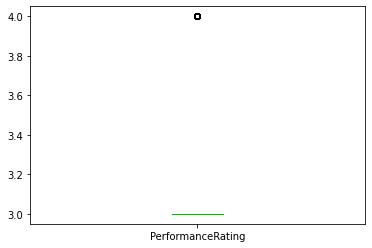

In [710]:
df['PerformanceRating'].plot.box()

As per above observation there is an outlier in PerformanceRating column

<AxesSubplot:>

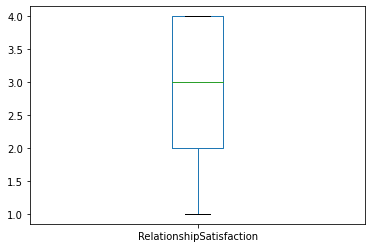

In [711]:
df['RelationshipSatisfaction'].plot.box()

As per above observation there is no outlier in RelationshipSatisfaction column

<AxesSubplot:>

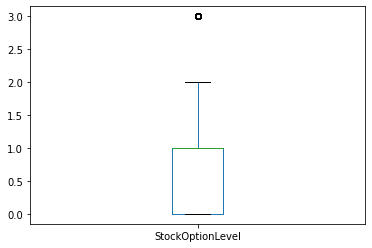

In [712]:
df['StockOptionLevel'].plot.box()

As per above observation there is an outlier in StockOptionLevel column

<AxesSubplot:>

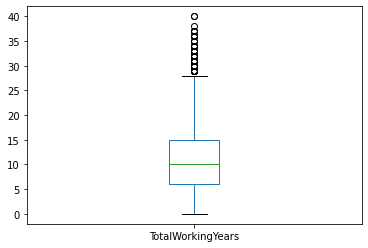

In [713]:
df['TotalWorkingYears'].plot.box()

As per above observation there is an outlier in TotalWorkingYears column

<AxesSubplot:>

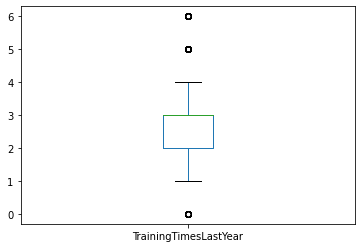

In [714]:
df['TrainingTimesLastYear'].plot.box()

As per above observation there is an outlier in TrainingTimesLastYear column

<AxesSubplot:>

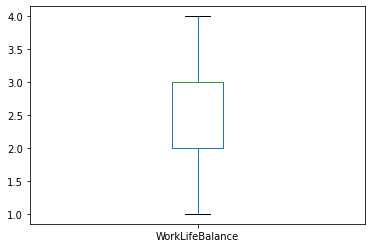

In [715]:
df['WorkLifeBalance'].plot.box()

As per above observation there is no outlier in WorkLifeBalance column

<AxesSubplot:>

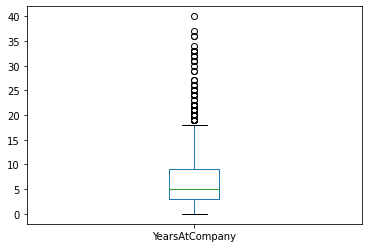

In [716]:
df['YearsAtCompany'].plot.box()

As per above observation there is an outlier in YearsAtCompany column

<AxesSubplot:>

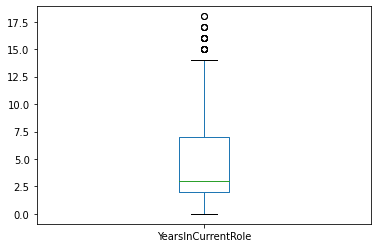

In [717]:
df['YearsInCurrentRole'].plot.box()

As per above observation there is an outlier in YearsInCurrentRole column

<AxesSubplot:>

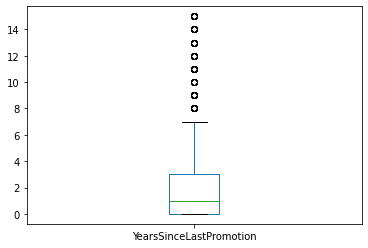

In [718]:
df['YearsSinceLastPromotion'].plot.box()

As per above observation there is an outlier in YearsSinceLastPromotion column

<AxesSubplot:>

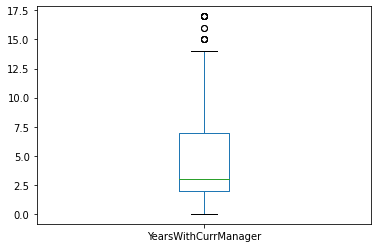

In [719]:
df['YearsWithCurrManager'].plot.box()

As per above observation there is an outlier in YearsWithCurrManager column

# Checking Skewness

In [720]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

Findings skewed data from the above observation are mentioned below:
    

DistanceFromHome -------- --          0.958118

JobLevel ---------                    1.025401

MonthlyIncome ---------               1.369817

NumCompaniesWorked ----------         1.026471

PercentSalaryHike ----------          0.821128

PerformanceRating----------           1.921883

StockOptionLevel ----------           0.968980

TotalWorkingYears----------           1.117172

TrainingTimesLastYear----------       0.553124

WorkLifeBalance----------            -0.552480

YearsAtCompany ----------             1.764529

YearsInCurrentRole----------          0.917363

YearsSinceLastPromotion----------     1.984290

YearsWithCurrManager----------        0.833451   

# Checking Normal Distribution

# As per the Normal Distribution definition  mean=median=mode 

<AxesSubplot:xlabel='Age'>

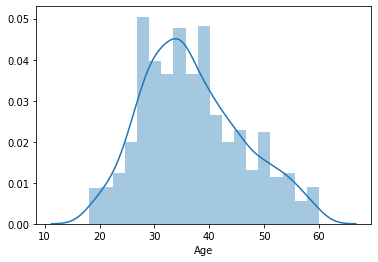

In [721]:
sns.distplot(df['Age'])

In [722]:
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

From above observation, Normal distribution shows data is skewed

<AxesSubplot:xlabel='DailyRate'>

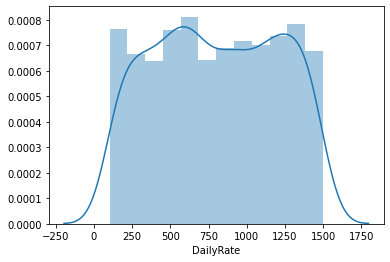

In [723]:
sns.distplot(df['DailyRate'])

In [724]:
df['DailyRate'].describe()

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

From above observation, Normal distribution shows data is skewed

<AxesSubplot:xlabel='DailyRate'>

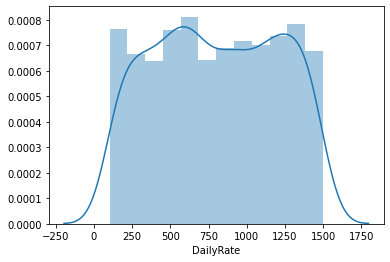

In [725]:
sns.distplot(df['DailyRate'])

In [726]:
df['DailyRate'].describe()

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

From above observation, Normal distribution shows data is skewed

<AxesSubplot:xlabel='DistanceFromHome'>

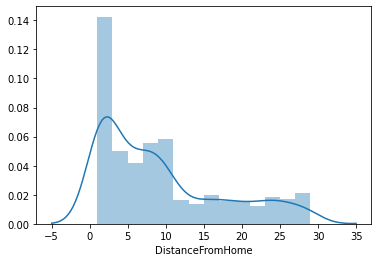

In [727]:
sns.distplot(df['DistanceFromHome'])

In [728]:
df['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

From above observation, Normal distribution shows data is  skewed.

<AxesSubplot:xlabel='Education'>

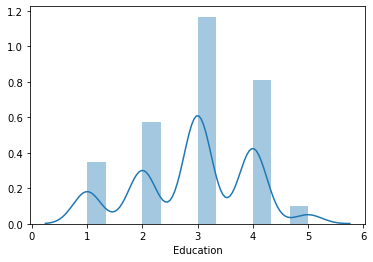

In [729]:
sns.distplot(df['Education'])

In [730]:
df['Education'].describe()

count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

From above observation, Normal distribution shows data is  skewed.

<AxesSubplot:xlabel='EnvironmentSatisfaction'>

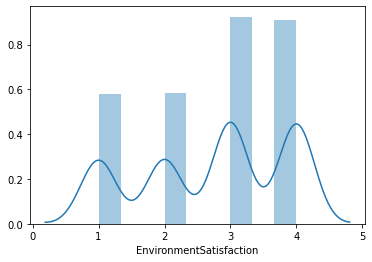

In [731]:
sns.distplot(df['EnvironmentSatisfaction'])

In [732]:
df['EnvironmentSatisfaction'].describe()

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='HourlyRate'>

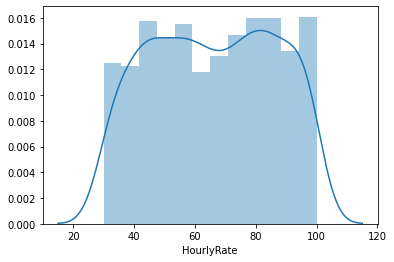

In [733]:
sns.distplot(df['HourlyRate'])

In [734]:
df['HourlyRate'].describe()

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='JobInvolvement'>

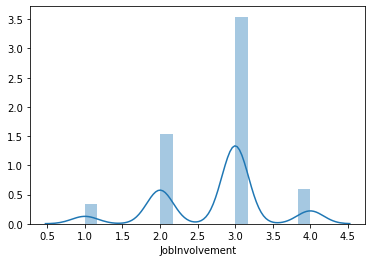

In [735]:
sns.distplot(df['JobInvolvement'])

In [736]:
df['JobInvolvement'].describe()

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='JobLevel'>

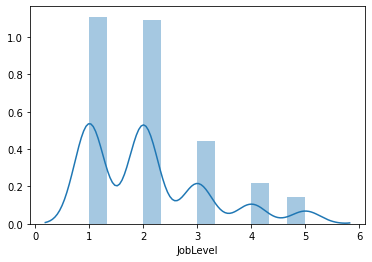

In [737]:
sns.distplot(df['JobLevel'])

In [738]:
df['JobLevel'].describe()

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='JobSatisfaction'>

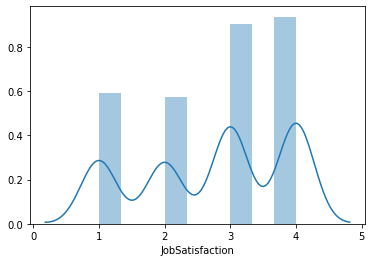

In [739]:
sns.distplot(df['JobSatisfaction'])

In [740]:
df['JobSatisfaction'].describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='MonthlyIncome'>

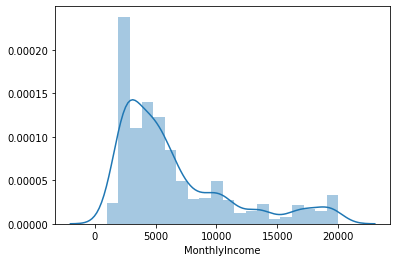

In [741]:
sns.distplot(df['MonthlyIncome'])

In [742]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='MonthlyRate'>

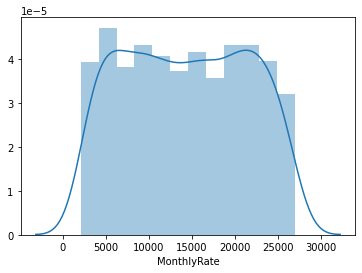

In [743]:
sns.distplot(df['MonthlyRate'])

In [744]:
df['MonthlyRate'].describe()

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='MonthlyRate'>

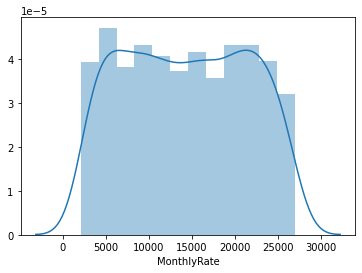

In [745]:
sns.distplot(df['MonthlyRate'])

In [746]:
df['MonthlyRate'].describe()

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='NumCompaniesWorked'>

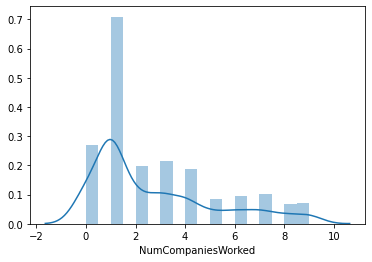

In [747]:
sns.distplot(df['NumCompaniesWorked'])

In [748]:
df['NumCompaniesWorked'].describe()

count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='PercentSalaryHike'>

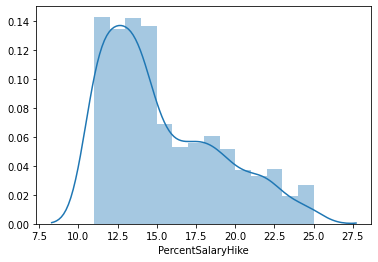

In [749]:
sns.distplot(df['PercentSalaryHike'])

In [750]:
df['PercentSalaryHike'].describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='RelationshipSatisfaction'>

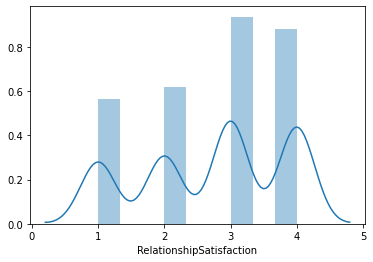

In [751]:
sns.distplot(df['RelationshipSatisfaction'])

In [752]:
df['RelationshipSatisfaction'].describe()

count    1470.000000
mean        2.712245
std         1.081209
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: RelationshipSatisfaction, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='StockOptionLevel'>

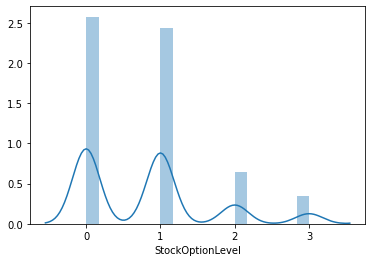

In [753]:
sns.distplot(df['StockOptionLevel'])

In [754]:
df['StockOptionLevel'].describe()

count    1470.000000
mean        0.793878
std         0.852077
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='TotalWorkingYears'>

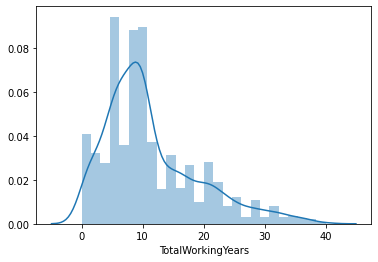

In [755]:
sns.distplot(df['TotalWorkingYears'])

In [756]:
df['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='TrainingTimesLastYear'>

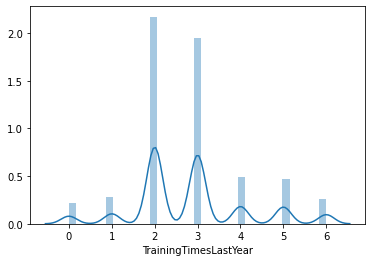

In [757]:
sns.distplot(df['TrainingTimesLastYear'])

In [758]:
df['TrainingTimesLastYear'].describe()

count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='WorkLifeBalance'>

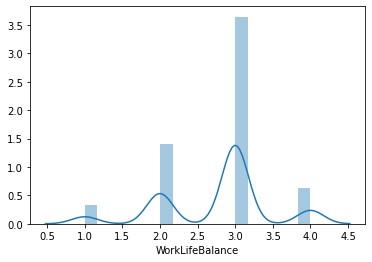

In [759]:
sns.distplot(df['WorkLifeBalance'])

In [760]:
df['WorkLifeBalance'].describe()

count    1470.000000
mean        2.761224
std         0.706476
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='YearsAtCompany'>

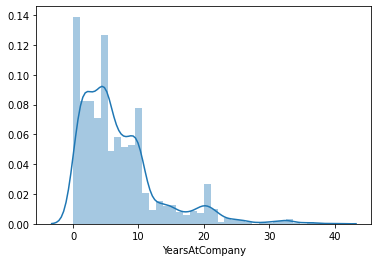

In [761]:
sns.distplot(df['YearsAtCompany'])

In [762]:
df['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='YearsInCurrentRole'>

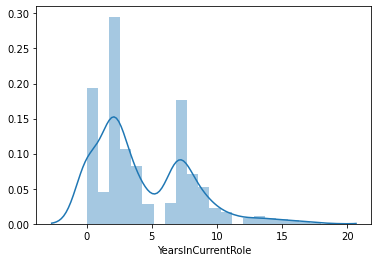

In [763]:
sns.distplot(df['YearsInCurrentRole'])

In [764]:
df['YearsInCurrentRole'].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

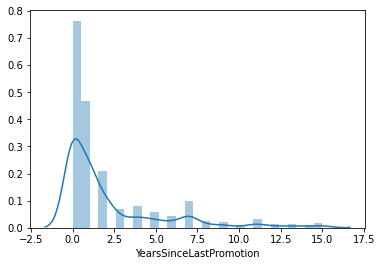

In [765]:
sns.distplot(df['YearsSinceLastPromotion'])

In [766]:
df['YearsSinceLastPromotion'].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

From above observation, Normal distribution shows data is skewed.

<AxesSubplot:xlabel='YearsWithCurrManager'>

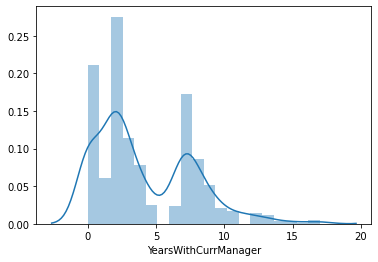

In [767]:
sns.distplot(df['YearsWithCurrManager'])

In [768]:
df['YearsWithCurrManager'].describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

From above observation, Normal distribution shows data is skewed.

# Using label encoder to convert categorical data into numerical data

In [769]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [770]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
        

In [771]:
# checking Data types 
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

As per above observation data has successfully  converted from categorical to numerical data

# Removing Outliers:

In [772]:
from scipy.stats import zscore
import numpy as np

In [773]:
z=np.abs(zscore(df))
z.shape

(1470, 31)

# using np.where function so that it will return the index where data points are outlier

In [774]:
threshold =3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430]), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 27, 30, 29, 28, 28,

# Extracting the data points those are in the range of (-3,3)

In [775]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1470, 31)
(1387, 31)


As per above observation 83 data points are outlier

# checkig % of data loss

In [776]:
loss = (1470-1387)/1470*100
print(loss)

5.646258503401361


As per above observation we are loosing 5.64% of data

# Dividing the Dataset into features and vectors where x is  feature  and  y is vector 

In [777]:
x = df_new.drop('Attrition',axis=1)
y = df_new['Attrition']

# Transforming data to remove skewness with the help of power_transform technique

In [778]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


# Treating Imbalance dataset

In [779]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [780]:
smtx,smty = smt.fit_resample(x,y)

In [781]:
smty.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

As per above observation,  total reords of 1 and 0 is equal.

# Trying to get Best accuracy_score on Best Random state

In [782]:
maxAccu=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(smtx,smty,test_size=0.2,random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(pred,y_test)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy_score",maxAccu,"on best random_state",maxRS)        

Best accuracy_score 0.8556034482758621 on best random_state 75


In [799]:
x_train,x_test,y_train,y_test=train_test_split(smtx,smty,test_size=0.2,random_state=75)

# Logistic Regression

In [800]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pr = lr.predict(x_test)
print(accuracy_score(lr_pr,y_test))
print(classification_report(lr_pr,y_test))

0.8556034482758621
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       240
           1       0.86      0.84      0.85       224

    accuracy                           0.86       464
   macro avg       0.86      0.86      0.86       464
weighted avg       0.86      0.86      0.86       464



Through Logistic Regression we are getting 86 % accuracy_score

# Decision Tree Classifier

In [801]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pd = dt.predict(x_test)
print(accuracy_score(dt_pd,y_test))
print(classification_report(dt_pd,y_test))

0.8448275862068966
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       223
           1       0.88      0.81      0.84       241

    accuracy                           0.84       464
   macro avg       0.85      0.85      0.84       464
weighted avg       0.85      0.84      0.84       464



Through Decision Tree Classifier we are getting 84 % accuracy_score

# Random Forest Classifier

In [802]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pd = rfc.predict(x_test)
print(accuracy_score(rfc_pd,y_test))
print(classification_report(rfc_pd,y_test))

0.9482758620689655
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       253
           1       0.92      0.97      0.94       211

    accuracy                           0.95       464
   macro avg       0.95      0.95      0.95       464
weighted avg       0.95      0.95      0.95       464



Through Random Forest Classifier we are getting 95 % accuracy_score

# XGBClassifier

In [803]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pd = xgb.predict(x_test)
print(accuracy_score(xgb_pd,y_test))
print(classification_report(xgb_pd,y_test))

0.9396551724137931
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       247
           1       0.93      0.94      0.94       217

    accuracy                           0.94       464
   macro avg       0.94      0.94      0.94       464
weighted avg       0.94      0.94      0.94       464



Throgh XGBClassifier we are getting 94 % accuracy_score

# Cross validation

In [804]:
from sklearn.model_selection import cross_val_score

In [805]:
print(cross_val_score(lr,smtx,smty,cv=5).mean())

0.8074309227675579


Through Logistic Regression we are getting 80.74 % accuracy_score in Cross validation

In [806]:
print(cross_val_score(dt,smtx,smty,cv=5).mean())

0.8592835331794146


Through Decision Tree Classifier we are getting 85.92 % accuracy_score in Cross validation

In [807]:
print(cross_val_score(rfc,smtx,smty,cv=5).mean())

0.9404762791390482


Through Random Forest Classifier we are getting 94.04 % accuracy_score in Cross validation

In [808]:
print(cross_val_score(xgb,smtx,smty,cv=5).mean())

0.8934786251582632


Through XGBClassifier we are getting 89.34 % accuracy_score in Cross validation

In [809]:
#model                  Ac                    CV                                 diff
#lr                     86                   80.74                               5.26
#dtc                    84                   85.92                              -1.92
#rfc                    95                   94.04                               0.96
#xgb                    94                   89.34                               4.66


Findings from the above observation are mentioned below:
 
We will go with  Random Forest Classifier because the difference between accuracy_score and cross_val_score is lesser in comparison to other algorithm

# Using Hyper parameter Tunning to tune  the model

In [811]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [821]:
parameter = {'n_estimators':[1000],
              'max_features':['auto','sqrt','log2'],
              'max_depth':np.arange(2,10),
              'criterion':['gini','entropy'],
             'min_samples_leaf':[1,2,3,4]}

In [822]:
gsc = GridSearchCV(estimator=rfc,param_grid=parameter,cv=5,n_jobs=-1)

In [823]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'n_estimators': [1000]})

# Using gsc.best_params_ to get best parameter 

In [824]:
gsc.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 1000}

#  Using best parameter to build the  final model

In [827]:
Final_model = RandomForestClassifier(criterion='entropy',max_depth=9,max_features='log2',min_samples_leaf=1,n_estimators=1000)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       248
           1       0.93      0.95      0.94       216

    accuracy                           0.95       464
   macro avg       0.95      0.95      0.95       464
weighted avg       0.95      0.95      0.95       464



In [828]:
from sklearn.metrics import roc_curve,auc

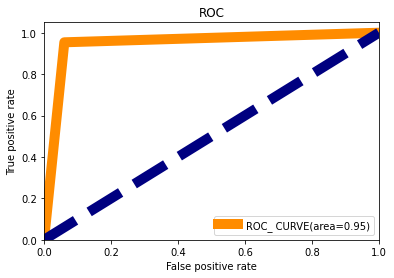

In [830]:
fpr,tpr,threshold=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC_ CURVE(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

As per above observation, we can say that this model is performing very good

# Checking how model is performing

In [833]:
import numpy as np
a=np.array(y_test)
predicted = np.array(rfc.predict(x_test))
df_com = pd.DataFrame({'Original':a,'predicted':predicted},index=range(len(a)))

In [834]:
df_com

,Original,predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
459,0,0
460,0,0
461,1,1
462,0,0


# Save Model

In [831]:
import joblib
joblib.dump(Final_model,"Final_Attrition_model")

['Final_Attrition_model']